## 1. ÿßŸÑÿ™ÿ≠ŸÖŸäŸÑ ŸàÿßŸÑÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt


In [2]:
path1 = r'E:\University\Ÿàÿ∏ŸäŸÅÿ©\train.csv'
path2 = r'E:\University\Ÿàÿ∏ŸäŸÅÿ©\test.csv'
path3 = r'E:\University\Ÿàÿ∏ŸäŸÅÿ©\sample_submission.csv'

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_sample_submission = pd.read_csv('sample_submission.csv')



ŸÖÿπÿ±ŸÅÿ© **ÿ£ÿ®ÿπÿßÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™** ŸÅŸä DataFrame
(ÿπÿØÿØ ÿßŸÑÿµŸÅŸàŸÅ ŸàÿßŸÑÿßÿπŸÖÿØÿ© ÿ∂ŸÖŸÜ ÿßŸÑÿØÿßÿ™ÿß)



##  2. ÿßÿ≥ÿ™ŸÉÿ¥ÿßŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ (EDA)

In [3]:
data_train.head(10)


id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
5  id0801584          2  2016-01-30 22:01:40  2016-01-30 22:09:03   
6  id1813257          1  2016-06-17 22:34:59  2016-06-17 22:40:40   
7  id1324603          2  2016-05-21 07:54:58  2016-05-21 08:20:49   
8  id1301050          1  2016-05-27 23:12:23  2016-05-27 23:16:38   
9  id0012891          2  2016-03-10 21:45:01  2016-03-10 22:05:26   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
5                6        -73.982857        40.742195         -73.992081   
6                4        -73.969017        40.757839         -73.957405   
7                1        -73.969276        40.797779         -73.922470   
8                1        -73.999481        40.738400         -73.985786   
9                1        -73.981049        40.744339         -73.973000   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435  
5         40.749184                  N            443  
6         40.765896                  N            341  
7         40.760559                  N           1551  
8         40.732815                  N            255  
9         40.789989                  N           1225

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [3]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿØÿ±ÿ¨ÿßÿ™ ÿ•ŸÑŸâ ÿ±ÿßÿØŸäÿßŸÜ
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    r = 6371000  # ŸÜÿµŸÅ ŸÇÿ∑ÿ± ÿßŸÑÿ£ÿ±ÿ∂ ÿ®ÿßŸÑÿ£ŸÖÿ™ÿßÿ±
    return c * r

data_train['trip_distance_meters'] = haversine_distance(
    data_train['pickup_latitude'], data_train['pickup_longitude'],
    data_train['dropoff_latitude'], data_train['dropoff_longitude']
)

print(data_train['trip_distance_meters'].head(10))


0    1498.520780
1    1805.507169
2    6385.098495
3    1485.498423
4    1188.588459
5    1098.942459
6    1326.278577
7    5714.980631
8    1310.353283
9    5121.161562
Name: trip_distance_meters, dtype: float64


##  3. ŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©

 ÿ™ÿ¨ŸáŸäÿ≤ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÑŸÑŸÜŸÖÿ∞ÿ¨ÿ©.


---


ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ÿ™ÿ≥ÿ®ÿ® ŸÖÿ¥ÿßŸÉŸÑ ŸÅŸä ÿßŸÑÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿßÿ™
(ÿ™ÿπŸàŸäÿ∂ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© )

 DataFrame ÿ™ŸÜÿ∏ŸäŸÅ ŸÇÿ®ŸÑ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®.

In [4]:
# ÿ™ÿπÿ®ÿ¶ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÅÿ¶ŸàŸäÿ© ŸàÿßŸÑÿπÿØÿØŸäÿ©

data_train['vendor_id'].fillna(data_train['vendor_id'].mode()[0], inplace=True)

data_train['store_and_fwd_flag'].fillna('N', inplace=True)

data_train['passenger_count'].fillna(data_train['passenger_count'].mode()[0], inplace=True)


ÿßŸÑÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ ÿπÿØŸÖ Ÿàÿ¨ŸàÿØ ŸÇŸäŸÖ ŸÖŸÅŸÇŸàÿØÿ©


In [7]:
data_train.isnull().sum()


id                      0
vendor_id               0
pickup_datetime         0
dropoff_datetime        0
passenger_count         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
store_and_fwd_flag      0
trip_duration           0
trip_distance_meters    0
dtype: int64

##  4. ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑÿ≥ŸÖÿßÿ™ Ÿàÿ™ÿ≠ŸàŸäŸÑŸáÿß

ŸÖÿπÿßŸÑÿ¨ÿ© ÿπŸÖŸàÿØ ÿßŸÑÿßŸÜÿ∑ŸÑÿßŸÇ:ÿ™ÿ≠ŸàŸäŸá ÿßŸÑŸâ datetime

ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿ≥ŸÖÿßÿ™ ÿ¨ÿØŸäÿØÿ©:


1.   is_weekend




In [5]:
# ÿπŸÖ ŸÜÿ¥ÿ™ÿ∫ŸÑ ÿπ ÿπÿßŸÖŸàÿØ ŸÑÿ≠ÿ∏ÿ© ÿßŸÑÿßŸÜÿ∑ŸÑÿßŸÇ
data_train['pickup_datetime'] = pd.to_datetime(data_train['pickup_datetime'])

data_train['pickup_hour'] = data_train['pickup_datetime'].dt.hour
data_train['pickup_day'] = data_train['pickup_datetime'].dt.day
data_train['pickup_weekday'] = data_train['pickup_datetime'].dt.dayofweek  # 0 = ÿßŸÑÿßÿ´ŸÜŸäŸÜ

# Weekend flag
data_train['is_weekend'] = data_train['pickup_weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [6]:
# ŸÖÿπÿßŸÑÿ¨ÿ© ŸàÿßŸÑÿπŸÖŸÑ ÿπ ÿ≤ŸÖŸÜ ÿßŸÑÿ±ÿ≠ŸÑÿ©
data_train['pickup_datetime'] = pd.to_datetime(data_train['pickup_datetime'])


In [7]:
data_train['pickup_hour'] = data_train['pickup_datetime'].dt.hour              # ÿßŸÑÿ≥ÿßÿπÿ© (0 - 23)
data_train['pickup_weekday'] = data_train['pickup_datetime'].dt.dayofweek     # ÿßŸÑŸäŸàŸÖ ÿ®ÿßŸÑÿ£ÿ≥ÿ®Ÿàÿπ (0=ÿßŸÑÿ•ÿ´ŸÜŸäŸÜ)
data_train['pickup_month'] = data_train['pickup_datetime'].dt.month           # ÿßŸÑÿ¥Ÿáÿ± (1 - 12)
data_train['pickup_day'] = data_train['pickup_datetime'].dt.day               # ÿßŸÑŸäŸàŸÖ ÿ®ÿßŸÑÿ¥Ÿáÿ±
data_train['pickup_is_weekend'] = data_train['pickup_weekday'].isin([5,6])    # ÿ¨ŸÖÿπÿ© ÿ£Ÿà ÿ≥ÿ®ÿ™ÿü


In [8]:
data_train[['pickup_datetime', 'pickup_hour', 'pickup_weekday', 'pickup_month', 'pickup_is_weekend']].head(2)


pickup_datetime  pickup_hour  pickup_weekday  pickup_month  \
0 2016-03-14 17:24:55           17               0             3   
1 2016-06-12 00:43:35            0               6             6   

   pickup_is_weekend  
0              False  
1               True

In [9]:
data_train[['pickup_hour', 'pickup_weekday', 'pickup_month', 'pickup_day']].describe()


pickup_hour  pickup_weekday  pickup_month    pickup_day
count  1.458644e+06    1.458644e+06  1.458644e+06  1.458644e+06
mean   1.360648e+01    3.050375e+00  3.516818e+00  1.550402e+01
std    6.399693e+00    1.954039e+00  1.681038e+00  8.703135e+00
min    0.000000e+00    0.000000e+00  1.000000e+00  1.000000e+00
25%    9.000000e+00    1.000000e+00  2.000000e+00  8.000000e+00
50%    1.400000e+01    3.000000e+00  4.000000e+00  1.500000e+01
75%    1.900000e+01    5.000000e+00  5.000000e+00  2.300000e+01
max    2.300000e+01    6.000000e+00  6.000000e+00  3.100000e+01

ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ŸÖŸäÿ≤ÿßÿ™ ŸÇŸàŸäÿ© ŸÑŸÖÿ±ÿ≠ŸÑÿ© ÿßŸÑŸÜŸÖÿ∞ÿ¨ÿ©.

1.ÿ≥ŸÖÿßÿ™ ÿ≤ŸÖŸÜŸäÿ©

2.ÿπÿØÿØ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ≠ÿ≥ÿ® ŸÉŸÑ ŸäŸàŸÖ

3.ÿßŸÑÿÆÿµÿßÿ¶ÿµ ÿßŸÑÿØŸàÿ±Ÿäÿ© ŸÑŸÑÿ≥ÿßÿπÿ© 

4.ÿ™ÿµŸÜŸäŸÅ ÿßŸÑÿßŸàŸÇÿßÿ™

ŸÅŸáŸÖ ÿßŸÑÿ≥ŸÑŸàŸÉ ÿßŸÑÿ≤ŸÖŸÜŸä ŸÑŸÑÿ±ŸÉÿßÿ® ŸàÿßŸÑÿ≥ÿßÿ¶ŸÇŸäŸÜ.

ÿ™ÿ≠ÿ≥ŸäŸÜ ÿ£Ÿä ŸÜŸÖŸàÿ∞ÿ¨ ÿ™ŸÜÿ®ÿ§ (Regression / Classification).

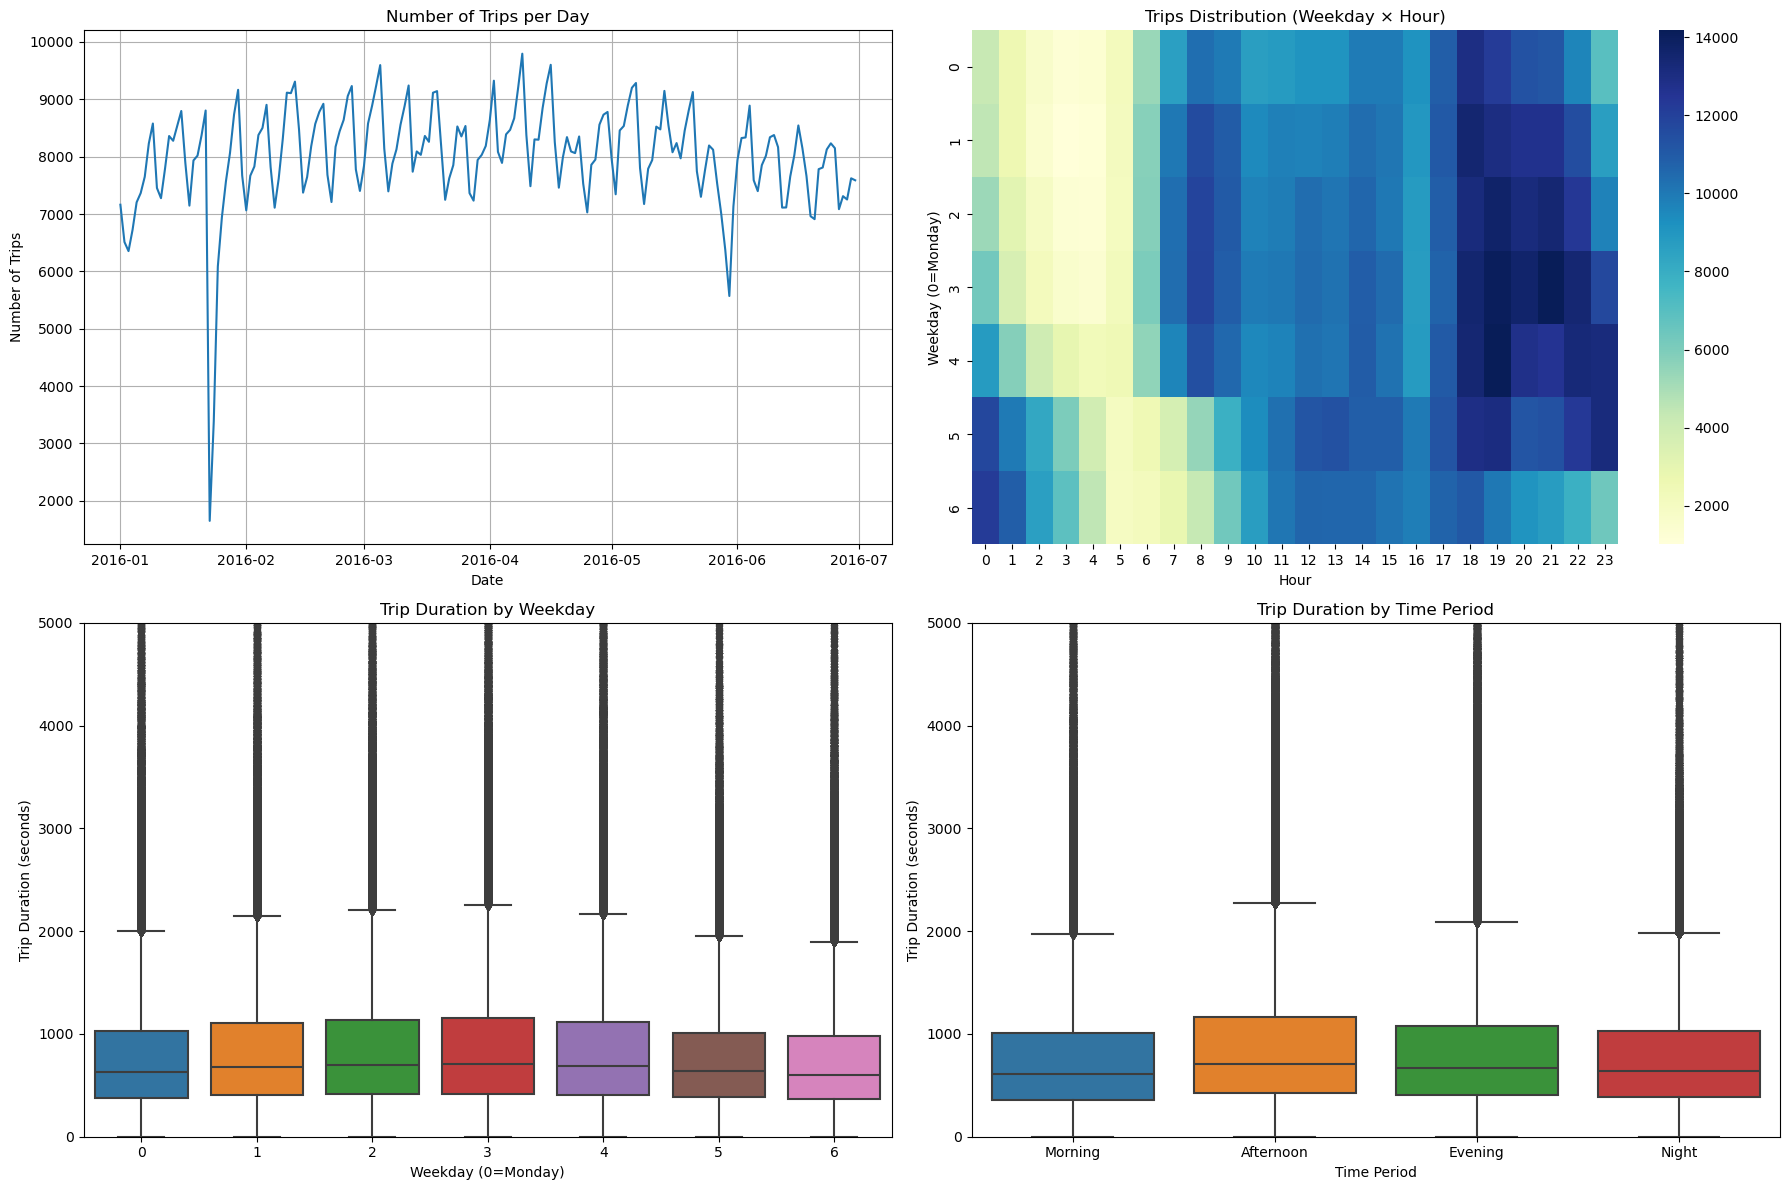

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑÿ≥ŸÖÿßÿ™ ÿßŸÑÿ≤ŸÖŸÜŸäÿ©
data_train['pickup_weekday'] = data_train['pickup_datetime'].dt.dayofweek
data_train['pickup_date'] = data_train['pickup_datetime'].dt.date

# ÿπÿØÿØ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ≠ÿ≥ÿ® ŸÉŸÑ ŸäŸàŸÖ
daily_counts = data_train.groupby('pickup_date').size()

# ÿßŸÑÿÆÿµÿßÿ¶ÿµ ÿßŸÑÿØŸàÿ±Ÿäÿ© ŸÑŸÑÿ≥ÿßÿπÿ©
data_train['pickup_hour_sin'] = np.sin(2 * np.pi * data_train['pickup_hour'] / 24)
data_train['pickup_hour_cos'] = np.cos(2 * np.pi * data_train['pickup_hour'] / 24)

# ÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸàŸÇÿ™ ÿ•ŸÑŸâ ŸÅÿ™ÿ±ÿßÿ™
def get_time_period(hour):
    if 5 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data_train['time_period'] = data_train['pickup_hour'].apply(get_time_period)

# ÿßŸÑÿ±ÿ≥ŸÖ
plt.figure(figsize=(18, 12))

# 1. Number of trips per day
plt.subplot(2, 2, 1)
daily_counts.plot()
plt.title("Number of Trips per Day")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)

# 2. Heatmap: Hour √ó Weekday
plt.subplot(2, 2, 2)
heatmap_data = data_train.groupby(['pickup_weekday', 'pickup_hour']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Trips Distribution (Weekday √ó Hour)")
plt.xlabel("Hour")
plt.ylabel("Weekday (0=Monday)")

# 3. Trip duration by weekday
plt.subplot(2, 2, 3)
sns.boxplot(x='pickup_weekday', y='trip_duration', data=data_train)
plt.title("Trip Duration by Weekday")
plt.xlabel("Weekday (0=Monday)")
plt.ylabel("Trip Duration (seconds)")
plt.ylim(0, 5000)

# 4. Trip duration by time period
plt.subplot(2, 2, 4)
sns.boxplot(x='time_period', y='trip_duration', data=data_train, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title("Trip Duration by Time Period")
plt.xlabel("Time Period")
plt.ylabel("Trip Duration (seconds)")
plt.ylim(0, 5000)

plt.tight_layout()
plt.show()


In [11]:
# ŸÜÿ≠ÿØÿØ ÿßŸÑŸÖÿ™ÿ∫Ÿäÿ± ÿßŸÑŸáÿØŸÅ
target = 'trip_duration'

# ŸÜÿÆÿ™ÿßÿ± ÿ®ÿπÿ∂ ÿßŸÑÿ≥ŸÖÿßÿ™ ÿßŸÑŸÖÿ≠ÿ™ŸÖŸÑÿ©
features = [
    'passenger_count',
    'trip_distance_meters',
    'pickup_hour',
    'pickup_weekday',
    'pickup_latitude',
    'pickup_longitude',
    'dropoff_latitude',
    'dropoff_longitude'
]

X = data_train[features]
y = data_train[target]


Using Random Forest Regressor 
1. ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸáÿØŸÅ ŸàÿßŸÑŸÖÿ™ÿ∫Ÿäÿ±ÿßÿ™ ÿßŸÑŸÖŸáŸÖÿ©
2. ŸÅÿµŸÑ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸàÿßŸÑŸáÿØŸÅ
3. ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÑŸÑÿ™ÿØÿ±Ÿäÿ® ŸàÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
4. ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ Random Forest
5. ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿ£ŸáŸÖŸäÿ© ÿßŸÑŸÖŸäÿ≤ÿßÿ™
 6. ÿ±ÿ≥ŸÖ ÿ£ŸáŸÖŸäÿ© ÿßŸÑŸÖŸäÿ≤ÿßÿ™

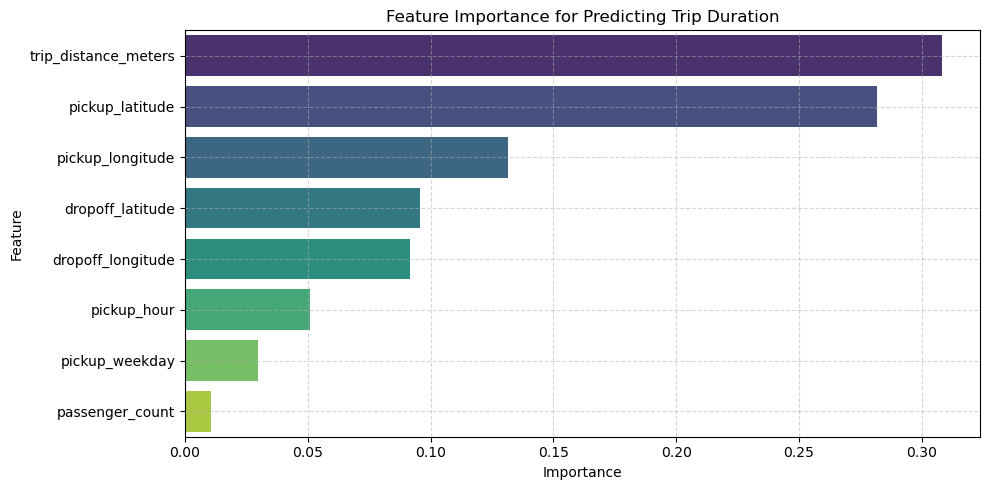

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ŸÜŸÖŸàÿ∞ÿ¨ Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑÿ£ŸáŸÖŸäÿ©
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# ÿ±ÿ≥ŸÖ
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance for Predicting Trip Duration")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


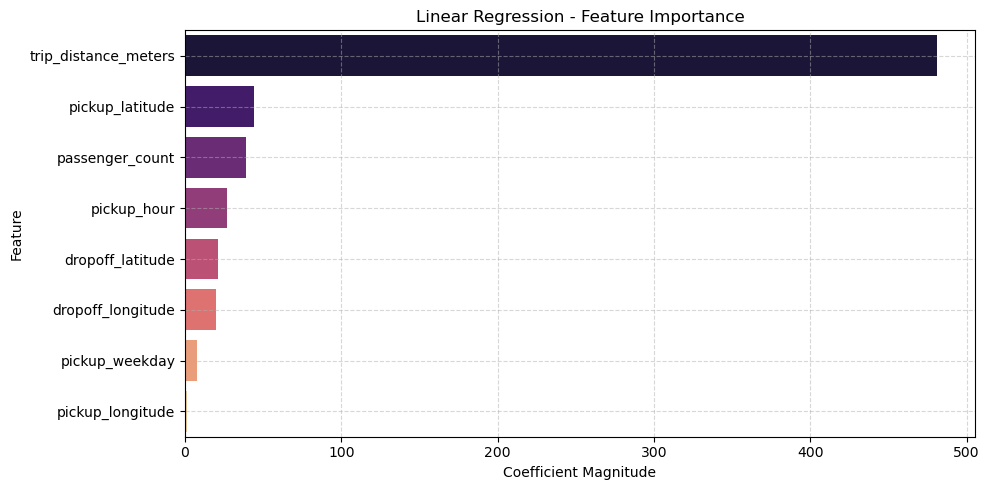

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# ÿ™Ÿàÿ≠ŸäÿØ ÿßŸÑŸÖŸäÿ≤ÿßÿ™
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑÿßŸÜÿ≠ÿØÿßÿ± ÿßŸÑÿÆÿ∑Ÿä
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑŸÖÿπÿßŸÖŸÑÿßÿ™ ŸÉÿ£ŸáŸÖŸäÿ©
importance_df_lr = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(lr_model.coef_)  # ŸÜÿ£ÿÆÿ∞ ÿßŸÑŸÇŸäŸÖÿ© ÿßŸÑŸÖÿ∑ŸÑŸÇÿ© ŸÑÿ£ŸÜ ÿ®ÿπÿ∂ ÿßŸÑŸÇŸäŸÖ ŸÇÿØ ÿ™ŸÉŸàŸÜ ÿ≥ÿßŸÑÿ®ÿ©
}).sort_values(by='Importance', ascending=False)

# ÿ±ÿ≥ŸÖ ÿßŸÑÿ£ŸáŸÖŸäÿ©
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df_lr, palette='magma')
plt.title("Linear Regression - Feature Importance")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


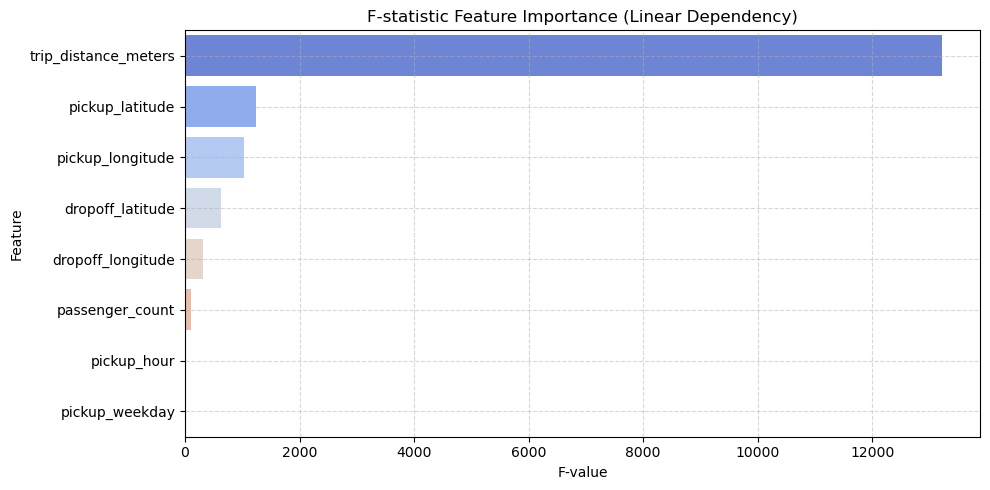

In [27]:
from sklearn.feature_selection import f_regression

f_values, p_values = f_regression(X, y)

importance_df_f = pd.DataFrame({
    'Feature': features,
    'F_value': f_values
}).sort_values(by='F_value', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='F_value', y='Feature', data=importance_df_f, palette='coolwarm')
plt.title("F-statistic Feature Importance (Linear Dependency)")
plt.xlabel("F-value")
plt.ylabel("Feature")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [12]:
def clean_data(df, feature_cols, target_col):
    df = df.dropna(subset=feature_cols + [target_col])

    def remove_outliers_iqr(df, col):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        return df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

    for col in ['trip_distance_meters', 'trip_duration']:
        df = remove_outliers_iqr(df, col)

    return df

# ÿßŸÑÿ£ÿπŸÖÿØÿ©
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

data_clean = clean_data(data_train, feature_cols, target_col)


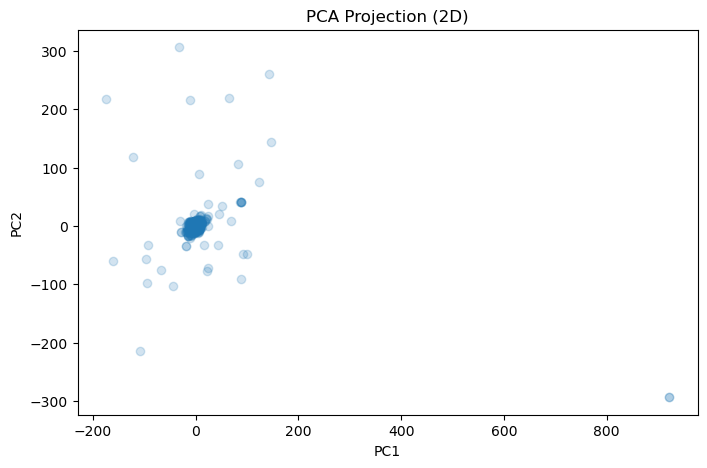

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ÿ™ÿ¨ŸáŸäÿ≤ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
features = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude','pickup_hour', 'pickup_weekday']
X_scaled = StandardScaler().fit_transform(data_train[features])

# ÿ™ÿ∑ÿ®ŸäŸÇ PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ÿ±ÿ≥ŸÖ ŸÜÿ™ÿßÿ¶ÿ¨ PCA
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
plt.title('PCA Projection (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [13]:
from sklearn.feature_selection import SelectKBest, f_regression

# Feature selection
X = data_train[features]
y = data_train['trip_duration']
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# ÿπÿ±ÿ∂ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨
feature_scores = pd.DataFrame({'Feature': features, 'Score': selector.scores_})
feature_scores.sort_values(by='Score', ascending=False)


Feature         Score
1  trip_distance_meters  13221.214696
4       pickup_latitude   1245.138961
5      pickup_longitude   1028.325049
6      dropoff_latitude    623.863542
7     dropoff_longitude    314.331689
0       passenger_count    104.676213
2           pickup_hour     19.864648
3        pickup_weekday      0.730159

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# --- 1. ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑÿ£ÿπŸÖÿØÿ© ---
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = ColumnTransformer([
    ('scale_features', StandardScaler(), feature_cols)
])

pipeline = Pipeline([
    ('scaling', scaler),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(f"Model R^2 Score: {score:.4f}")


Model R^2 Score: 0.6081


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(n_estimators=300, learning_rate=0.03, random_state=42))
])

pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(f"Improved GB R^2 Score: {score:.4f}")


Improved GB R^2 Score: 0.5512


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖÿ©
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸàÿßŸÑŸáÿØŸÅ
X = data_clean[feature_cols]
y = data_clean[target_col]

# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ•ŸÑŸâ ÿ™ÿØÿ±Ÿäÿ® ŸàÿßÿÆÿ™ÿ®ÿßÿ±
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÿ•ŸÜÿ¥ÿßÿ° ÿ®ÿßŸäÿ®ŸÑÿßŸäŸÜ ŸÖÿπ Decision Tree
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=10, random_state=42))  # ŸÖŸÖŸÉŸÜ ÿ™ÿπÿØŸÑ ÿßŸÑÿπŸÖŸÇ ÿ≠ÿ≥ÿ® ÿßŸÑÿ≠ÿßÿ¨ÿ©
])

# ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
pipeline.fit(X_train, y_train)

# ÿ™ŸÇŸäŸäŸÖ ÿßŸÑÿ£ÿØÿßÿ°
score = pipeline.score(X_test, y_test)
print(f"Decision Tree R^2 Score: {score:.4f}")


Decision Tree R^2 Score: 0.5592


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖÿ©
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÿ®ÿßŸäÿ®ŸÑÿßŸäŸÜ ŸÖÿπ SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='rbf', C=1.0, epsilon=0.2))  # ŸÅŸäŸÉ ÿ™ÿπÿØŸÑ ÿßŸÑŸÖÿπÿßŸÖŸÑÿßÿ™ ÿ≠ÿ≥ÿ® ÿßŸÑÿ™ÿ¨ÿ±ÿ®ÿ©
])

# ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
pipeline.fit(X_train, y_train)

# ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
score = pipeline.score(X_test, y_test)
print(f"SVR R^2 Score: {score:.4f}")


In [59]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖÿ©
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÿ®ÿßŸäÿ®ŸÑÿßŸäŸÜ ŸÖÿπ LinearSVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearSVR(epsilon=1.0, C=1.0, random_state=42, max_iter=10000))
])

# ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
pipeline.fit(X_train, y_train)

# ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
score = pipeline.score(X_test, y_test)
print(f"Linear SVR R^2 Score: {score:.4f}")


Linear SVR R^2 Score: 0.4552


In [40]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# ŸÜŸÅÿ≥ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖÿ© ÿ≥ÿßÿ®ŸÇŸãÿß
X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ CatBoost
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    loss_function='RMSE',
    verbose=100,
    random_state=42
)

cat_model.fit(X_train, y_train)

# ÿßŸÑÿ™ŸÜÿ®ÿ§ ŸàÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨
y_pred = cat_model.predict(X_test)

print("üìä CatBoost Performance:")
print("  RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("  MAE :", mean_absolute_error(y_test, y_pred))
print("  R¬≤  :", r2_score(y_test, y_pred))


0:	learn: 366.3343107	total: 338ms	remaining: 2m 48s
100:	learn: 247.0896538	total: 14s	remaining: 55.3s
200:	learn: 241.7691704	total: 26.8s	remaining: 39.9s
300:	learn: 239.4103568	total: 39.5s	remaining: 26.1s
400:	learn: 237.8646812	total: 52.2s	remaining: 12.9s
499:	learn: 236.7894978	total: 1m 4s	remaining: 0us
üìä CatBoost Performance:
  RMSE: 237.6246219845319
  MAE : 178.6487777125405
  R¬≤  : 0.6011719935503466


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| ÿßŸÑÿÆÿ∑Ÿàÿ©               | ÿßŸÑŸÜŸàÿπ          | ŸÅÿßÿ¶ÿØÿ™Ÿáÿß                     |
| -------------------- | -------------- | --------------------------- |
| ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ `Pool`       | ÿØÿßÿÆŸÑŸä          | ÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑÿ£ÿØÿßÿ° Ÿàÿ£ŸáŸÖŸäÿ© ÿßŸÑŸÖŸäÿ≤ÿßÿ™ |
| `RandomizedSearchCV` | ÿ∂ÿ®ÿ∑ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨    | ÿ£ÿ≥ÿ±ÿπ ŸÖŸÜ GridSearch          |
| `log1p(y)`           | ŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑŸáÿØŸÅ   | ÿ™ÿÆŸÅŸäŸÅ ÿßŸÜÿ≠ÿ±ÿßŸÅ ÿßŸÑŸÇŸäŸÖ          |
| Feature Engineering  | ÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑŸÖÿØÿÆŸÑÿßÿ™ | ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿ≥ŸÖÿßÿ™ ÿ∞ÿßÿ™ ŸÖÿπŸÜŸâ       |
| Outlier Removal      | ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ | ÿßŸÑÿ™ÿÆŸÑÿµ ŸÖŸÜ ÿßŸÑÿ≠ÿßŸÑÿßÿ™ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ©  |


In [41]:
feature_names = X_train.columns


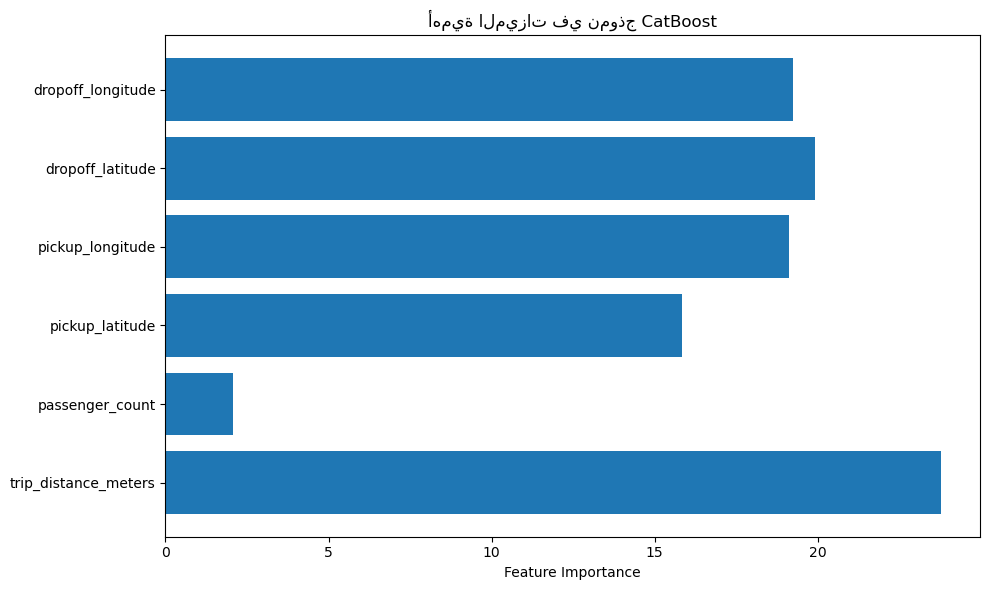

In [68]:

import matplotlib.pyplot as plt
import numpy as np

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑÿ£ŸáŸÖŸäÿ©
feature_importance = cat_best.get_feature_importance()
feature_names = X_train.columns  # ÿßÿ≥ÿ™ÿÆÿØŸÖ ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸÖŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™

# ÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÑÿ™ÿ∑ÿßÿ®ŸÇ
assert len(feature_importance) == len(feature_names), "‚ùå ÿπÿØÿØ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸÑÿß Ÿäÿ∑ÿßÿ®ŸÇ ÿπÿØÿØ ÿßŸÑŸÇŸäŸÖ!"

# ÿ±ÿ≥ŸÖ ÿßŸÑÿ£ŸáŸÖŸäÿ©
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.title("ÿ£ŸáŸÖŸäÿ© ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸÅŸä ŸÜŸÖŸàÿ∞ÿ¨ CatBoost")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


In [14]:
def haversine(lat1, lon1, lat2, lon2):
    import numpy as np
    R = 6371  # km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

data_clean['haversine_distance'] = haversine(
    data_clean['pickup_latitude'], data_clean['pickup_longitude'],
    data_clean['dropoff_latitude'], data_clean['dropoff_longitude']
)

# ÿ´ŸÖ ÿ£ÿ∂ŸÅŸáÿß ŸÑŸÑŸÖŸäÿ≤ÿßÿ™
feature_cols.append('haversine_distance')


In [19]:
# === 1. ÿ•ÿπÿØÿßÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÑŸÑÿ™ÿØÿ±Ÿäÿ® ===

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ (X) ŸàÿßŸÑŸáÿØŸÅ (y)
features = ['passenger_count', 'pickup_hour', 'pickup_day', 'pickup_weekday', 'is_weekend']
X = data_clean[features]
y = data_clean['trip_duration']

# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ÿ™Ÿàÿ≠ŸäÿØ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ (ŸÖŸáŸÖ ŸÑŸÄ Linear Regression Ÿà XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# === 2. ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ ===

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# ŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑÿßŸÜÿ≠ÿØÿßÿ± ÿßŸÑÿÆÿ∑Ÿä
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_val_scaled)

# ŸÜŸÖŸàÿ∞ÿ¨ ÿ¥ÿ¨ÿ±ÿ© ÿßŸÑŸÇÿ±ÿßÿ±
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_val)

# ŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑÿ∫ÿßÿ®ÿ© ÿßŸÑÿπÿ¥Ÿàÿßÿ¶Ÿäÿ©
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

# ŸÜŸÖŸàÿ∞ÿ¨ XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_val_scaled)

# === 3. ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ ===

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

print("üîç RMSE ŸÑŸÉŸÑ ŸÜŸÖŸàÿ∞ÿ¨:")
print(f"Linear Regression: {rmse(y_val, lr_preds):.2f}")
print(f"Decision Tree:     {rmse(y_val, dt_preds):.2f}")
print(f"Random Forest:     {rmse(y_val, rf_preds):.2f}")
print(f"XGBoost:           {rmse(y_val, xgb_preds):.2f}")


üîç RMSE ŸÑŸÉŸÑ ŸÜŸÖŸàÿ∞ÿ¨:
Linear Regression: 375.17
Decision Tree:     373.08
Random Forest:     372.82
XGBoost:           369.46


ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿ≥ŸÖÿßÿ™ ÿ¨ÿØŸäÿØÿ© ŸÖŸÜ ÿßŸÑÿ•ÿ≠ÿØÿßÿ´Ÿäÿßÿ™ ŸàÿßŸÑŸàŸÇÿ™.

ÿ≠ÿ≥ÿßÿ® ÿßŸÑŸÖÿ≥ÿßŸÅÿ© ÿ®ŸäŸÜ ŸÜŸÇÿ∑ÿ™Ÿä ÿßŸÑÿßŸÑÿ™ŸÇÿßÿ∑ ŸàÿßŸÑÿ™ŸàÿµŸäŸÑ (Haversine distance).

ÿ™ÿ≠ÿØŸäÿ´ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ÿ®Ÿáÿ∞Ÿá ÿßŸÑÿ≥ŸÖÿßÿ™.

ÿ•ÿπÿßÿØÿ© ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ XGBoost ŸàŸÖŸÇÿßÿ±ŸÜÿ© ÿßŸÑÿ£ÿØÿßÿ°.


In [15]:
import numpy as np

# ÿ≠ÿ≥ÿßÿ® ÿßŸÑŸÖÿ≥ÿßŸÅÿ© ÿ®ŸäŸÜ ÿßŸÑÿ•ÿ≠ÿØÿßÿ´Ÿäÿßÿ™ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ Haversine
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # ŸÜÿµŸÅ ŸÇÿ∑ÿ± ÿßŸÑÿ£ÿ±ÿ∂ ÿ®ÿßŸÑŸÉŸäŸÑŸàŸÖÿ™ÿ±
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    return R * 2 * np.arcsin(np.sqrt(a))

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑÿ≥ŸÖÿßÿ™ ŸÖŸÜ ÿßŸÑŸàŸÇÿ™
data_train['pickup_minute'] = data_train['pickup_datetime'].dt.minute
data_train['pickup_month'] = data_train['pickup_datetime'].dt.month

# ÿ≠ÿ≥ÿßÿ® ÿßŸÑŸÖÿ≥ÿßŸÅÿ© ÿßŸÑŸÅÿπŸÑŸäÿ©
data_train['distance_km'] = haversine_distance(
    data_train['pickup_latitude'],
    data_train['pickup_longitude'],
    data_train['dropoff_latitude'],
    data_train['dropoff_longitude']
)

# ÿ≠ÿ∞ŸÅ ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ© ŸÖŸÜ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿßŸÑÿ∑ŸàŸäŸÑÿ© ÿ¨ÿØŸãÿß (>3 ÿ≥ÿßÿπÿßÿ™)
data_train = data_train[data_train['trip_duration'] < 10800]

# ÿßŸÑÿ≥ŸÖÿßÿ™ ÿßŸÑŸÜŸáÿßÿ¶Ÿäÿ© ÿßŸÑÿ¨ÿØŸäÿØÿ©
features_updated = [
    'passenger_count', 'pickup_hour', 'pickup_day', 'pickup_weekday', 'is_weekend',
    'pickup_minute', 'pickup_month', 'distance_km'
]

# ÿ•ÿπÿßÿØÿ© ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ Ÿàÿ™Ÿàÿ≠ŸäÿØŸáÿß
X = data_train[features_updated]
y = data_train['trip_duration']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ÿ•ÿπÿßÿØÿ© ÿ™ÿØÿ±Ÿäÿ® XGBoost ÿπŸÑŸâ ÿßŸÑÿ≥ŸÖÿßÿ™ ÿßŸÑŸÖÿ≠ÿ≥ŸÜÿ©
import xgboost as xgb

xgb_improved = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_improved.fit(X_train_scaled, y_train)
xgb_preds = xgb_improved.predict(X_val_scaled)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

print(f" RMSE ÿ®ÿπÿØ ÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑÿ≥ŸÖÿßÿ™: {rmse(y_val, xgb_preds):.2f}")


 RMSE ÿ®ÿπÿØ ÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑÿ≥ŸÖÿßÿ™: 343.36


 ÿ≠ÿ∞ŸÅ ÿßŸÑÿ≥ŸÖÿßÿ™ ÿßŸÑÿ£ŸÇŸÑ ÿ£ŸáŸÖŸäÿ© (is_weekend Ÿà passenger_count)

In [16]:
# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ≥ŸÖÿßÿ™ ÿ∞ÿßÿ™ ÿßŸÑÿ™ÿ£ÿ´Ÿäÿ± ÿßŸÑŸÖŸÜÿÆŸÅÿ∂ ÿ≠ÿ≥ÿ® ÿ™ÿ≠ŸÑŸäŸÑ SHAP
features_reduced = [
    'pickup_hour', 'pickup_day', 'pickup_weekday', 'pickup_minute',
    'pickup_month', 'distance_km'
]

X = data_train[features_reduced]
y = data_train['trip_duration']

# ÿ•ÿπÿßÿØÿ© ÿßŸÑÿ™ŸÇÿ≥ŸäŸÖ ŸàÿßŸÑÿ™Ÿàÿ≠ŸäÿØ
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ÿ•ÿπÿßÿØÿ© ÿ™ÿØÿ±Ÿäÿ® XGBoost ÿ®ÿπÿØ ÿ™ŸÇŸÑŸäÿµ ÿßŸÑÿ≥ŸÖÿßÿ™
xgb_reduced = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_reduced.fit(X_train_scaled, y_train)
y_pred_reduced = xgb_reduced.predict(X_val_scaled)

print(f"üóëÔ∏è RMSE ÿ®ÿπÿØ ÿ≠ÿ∞ŸÅ ÿßŸÑÿ≥ŸÖÿßÿ™ ÿßŸÑÿ∂ÿπŸäŸÅÿ©: {rmse(y_val, y_pred_reduced):.2f}")


üóëÔ∏è RMSE ÿ®ÿπÿØ ÿ≠ÿ∞ŸÅ ÿßŸÑÿ≥ŸÖÿßÿ™ ÿßŸÑÿ∂ÿπŸäŸÅÿ©: 343.24


ÿ™ÿ≠ŸàŸäŸÑ pickup_hour ÿ•ŸÑŸâ ÿ™ŸÖÿ´ŸäŸÑ ÿØÿßÿ¶ÿ±Ÿä (sin/cos)
ŸÑÿ£ŸÜ ÿßŸÑŸàŸÇÿ™ Ÿäÿ™ŸÉÿ±ÿ± ŸÉŸÑ 24 ÿ≥ÿßÿπÿ©ÿå Ÿáÿ∞ÿß Ÿäÿ≥ÿßÿπÿØ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ ŸÅŸä ŸÅŸáŸÖ ÿßŸÑÿπŸÑÿßŸÇÿßÿ™ ÿßŸÑÿØŸàÿ±Ÿäÿ©

 ÿ•ÿ∂ÿßŸÅÿ© ÿ≥ŸÖÿ© is_night_ride 

In [17]:
data_train['is_night_ride'] = data_train['pickup_hour'].apply(lambda h: int(h >= 22 or h <= 5))


In [18]:
# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿ≥ÿßÿπÿ© ÿ•ŸÑŸâ ÿ™ŸÖÿ´ŸäŸÑ ÿØÿßÿ¶ÿ±Ÿä (ÿ≥ÿßÿπÿ© = ÿ≤ÿßŸàŸäÿ©)
data_train['pickup_hour_sin'] = np.sin(2 * np.pi * data_train['pickup_hour'] / 24)
data_train['pickup_hour_cos'] = np.cos(2 * np.pi * data_train['pickup_hour'] / 24)


In [19]:
features_enhanced = [
    'pickup_day', 'pickup_weekday', 'pickup_minute', 'pickup_month',
    'distance_km', 'is_night_ride', 
    'pickup_hour_sin', 'pickup_hour_cos',
    'trip_distance_meters',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]


##  5. ÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπ ŸàÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ©

ÿ±ÿ≥ŸÖ ÿ™Ÿàÿ≤Ÿäÿπ ŸÖÿØÿ© ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™( Histogram )


---

ŸÉ** **(outliers)**ŸäŸÅ ÿ™ÿ™Ÿàÿ≤ÿπ ŸÖÿØÿ© ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™**: ŸáŸÑ ŸÖÿπÿ∏ŸÖŸáÿß ŸÇÿµŸäÿ±ÿ©ÿü ÿ∑ŸàŸäŸÑÿ©ÿü ŸáŸÑ ŸÅŸäŸáÿß ŸÇŸäŸÖ ÿ¥ÿßÿ∞ÿ© ÿü

C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


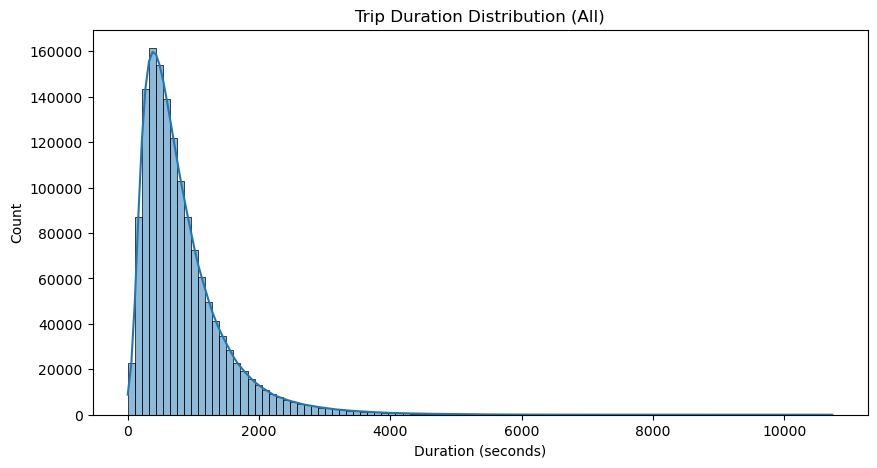

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data_train['trip_duration'], bins=100, kde=True)
plt.title('Trip Duration Distribution (All)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()



ÿßŸÑÿ™ÿ±ŸÉŸäÿ≤ ŸÅŸÇÿ∑ ÿπŸÑŸâ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿßŸÑÿ™Ÿä ŸÖÿØÿ™Ÿáÿß ÿ£ŸÇŸÑ ŸÖŸÜ ÿ≥ÿßÿπÿ™ŸäŸÜ (7200 ÿ´ÿßŸÜŸäÿ©).
---


ŸáŸà ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿ®ÿµÿ±Ÿäÿå ŸÑÿ£ŸÜ ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÉÿßŸÖŸÑ ÿ∫ÿßŸÑÿ®Ÿãÿß Ÿäÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ŸÇŸäŸÖ ÿ¥ÿßÿ∞ÿ© ÿ¨ÿØŸãÿß
(ÿ±ÿ≠ŸÑÿßÿ™ ÿ∑ŸàŸäŸÑÿ© ÿ¨ÿØŸãÿß) ÿ™ÿ¥ŸàŸëŸá ÿßŸÑÿ¥ŸÉŸÑ.

ÿ®ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖÿØÿ© ÿ•ŸÑŸâ ÿ£ŸÇŸÑ ŸÖŸÜ 7200 ÿ´ÿßŸÜŸäÿ©:

C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


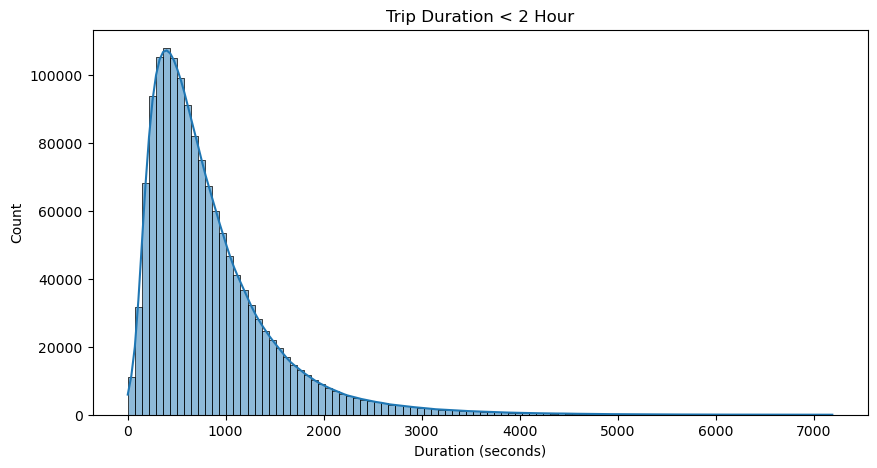

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data_train[data_train['trip_duration'] < 7200]['trip_duration'], bins=100, kde=True)
plt.title('Trip Duration < 2 Hour')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()


Ÿäÿπÿ∑Ÿä ŸÅŸÉÿ±ÿ© ÿπŸÜ ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ≠ÿ≥ÿ® ÿßŸÑÿ¥ÿ±ŸÉÿßÿ™.

ŸáŸÑ ŸäŸàÿ¨ÿØ ÿßŸÜÿ≠Ÿäÿßÿ≤ ŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ¥ÿ±ŸÉÿ© ŸÖÿπŸäŸÜÿ©ÿü


C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


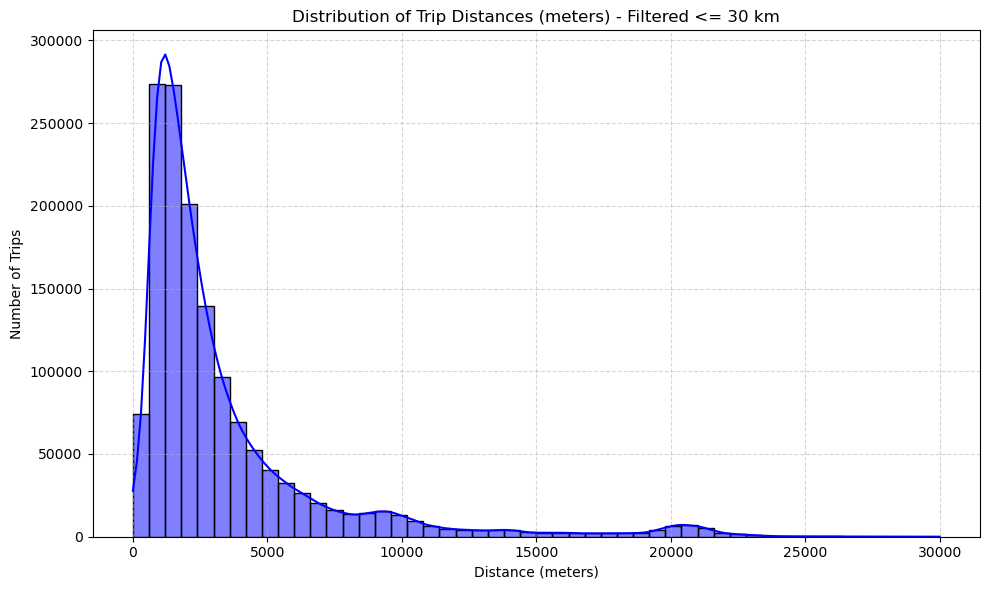

In [22]:
max_distance = 30000  # 30 ŸÉŸäŸÑŸàŸÖÿ™ÿ±

plt.figure(figsize=(10,6))
sns.histplot(data_train[data_train['trip_distance_meters'] <= max_distance]['trip_distance_meters'],
             bins=50, kde=True, color='blue')

plt.title('Distribution of Trip Distances (meters) - Filtered <= 30 km')
plt.xlabel('Distance (meters)')
plt.ylabel('Number of Trips')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


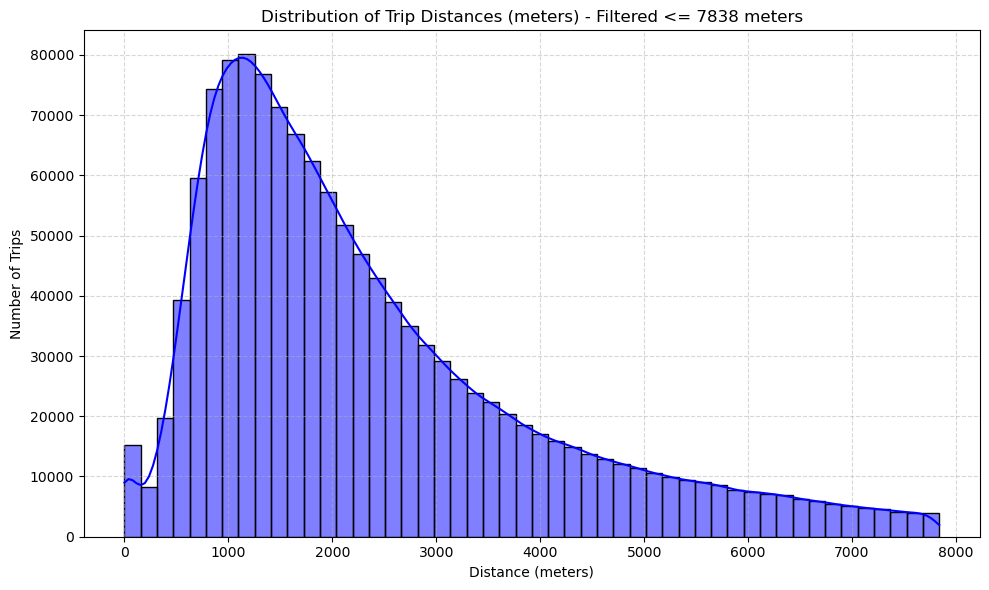

Upper bound (cut-off) for outliers based on IQR: 7838.36 meters


In [23]:
Q1 = data_train['trip_distance_meters'].quantile(0.25)
Q3 = data_train['trip_distance_meters'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(10,6))
sns.histplot(data_train[data_train['trip_distance_meters'] <= upper_bound]['trip_distance_meters'],
             bins=50, kde=True, color='blue')

plt.title(f'Distribution of Trip Distances (meters) - Filtered <= {int(upper_bound)} meters')
plt.xlabel('Distance (meters)')
plt.ylabel('Number of Trips')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Upper bound (cut-off) for outliers based on IQR: {upper_bound:.2f} meters")


C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


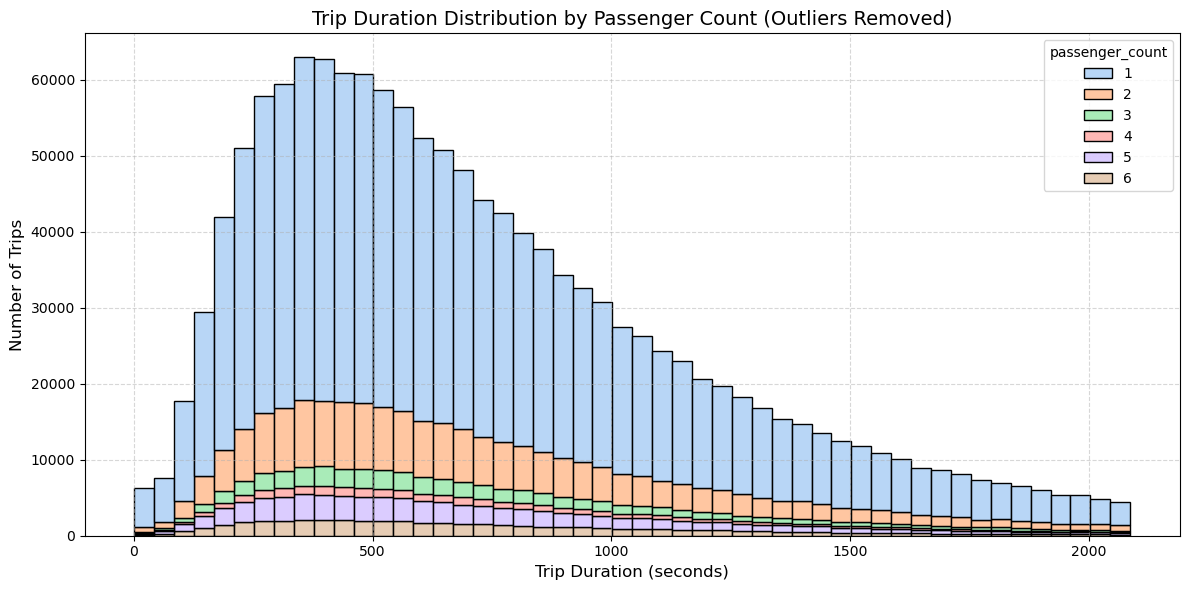

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÿ≠ÿ≥ÿßÿ® ÿ≠ÿØŸàÿØ ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ©
Q1 = data_train['trip_duration'].quantile(0.25)
Q3 = data_train['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ÿ™ÿµŸÅŸäÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿØŸàŸÜ ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ©
filtered_data = data_train[
    (data_train['trip_duration'] >= lower_bound) &
    (data_train['trip_duration'] <= upper_bound)
]

# ÿ™ÿ≠ÿØŸäÿØ ÿπÿØÿØ ÿ±ŸÉÿßÿ® ŸÖÿπŸÇŸàŸÑŸäŸÜ (ŸÖŸÜ 1 ÿ•ŸÑŸâ 6)
filtered_data = filtered_data[filtered_data['passenger_count'].isin(range(1, 7))]

# ÿ±ÿ≥ŸÖ Histogram ŸÖŸÑŸàŸëŸÜ ÿ®ÿ£ŸÑŸàÿßŸÜ pastel ÿ≠ÿ≥ÿ® ÿπÿØÿØ ÿßŸÑÿ±ŸÉÿßÿ®
plt.figure(figsize=(12, 6))
sns.histplot(
    data=filtered_data,
    x='trip_duration',
    hue='passenger_count',
    bins=50,
    multiple='stack',
    palette='pastel'  # ÿ™ÿ∫ŸäŸäÿ± ÿßŸÑÿ£ŸÑŸàÿßŸÜ
)

plt.title('Trip Duration Distribution by Passenger Count (Outliers Removed)', fontsize=14)
plt.xlabel('Trip Duration (seconds)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


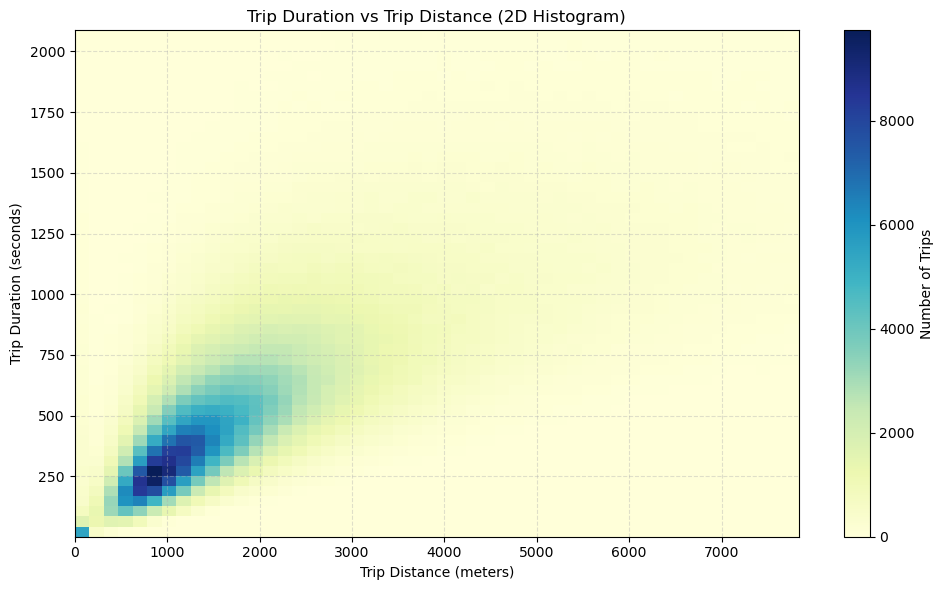

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ© ŸÖŸÜ trip_duration Ÿà trip_distance_meters
Q1_duration = data_train['trip_duration'].quantile(0.25)
Q3_duration = data_train['trip_duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
duration_min = Q1_duration - 1.5 * IQR_duration
duration_max = Q3_duration + 1.5 * IQR_duration

Q1_dist = data_train['trip_distance_meters'].quantile(0.25)
Q3_dist = data_train['trip_distance_meters'].quantile(0.75)
IQR_dist = Q3_dist - Q1_dist
dist_min = Q1_dist - 1.5 * IQR_dist
dist_max = Q3_dist + 1.5 * IQR_dist

# ÿ™ÿµŸÅŸäÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
filtered_data = data_train[
    (data_train['trip_duration'] >= duration_min) &
    (data_train['trip_duration'] <= duration_max) &
    (data_train['trip_distance_meters'] >= dist_min) &
    (data_train['trip_distance_meters'] <= dist_max)
]

# ÿ±ÿ≥ŸÖ ŸÖÿÆÿ∑ÿ∑ 2D histogram
plt.figure(figsize=(10, 6))
plt.hist2d(
    filtered_data['trip_distance_meters'],
    filtered_data['trip_duration'],
    bins=50,
    cmap='YlGnBu'
)

plt.colorbar(label='Number of Trips')
plt.title('Trip Duration vs Trip Distance (2D Histogram)')
plt.xlabel('Trip Distance (meters)')
plt.ylabel('Trip Duration (seconds)')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


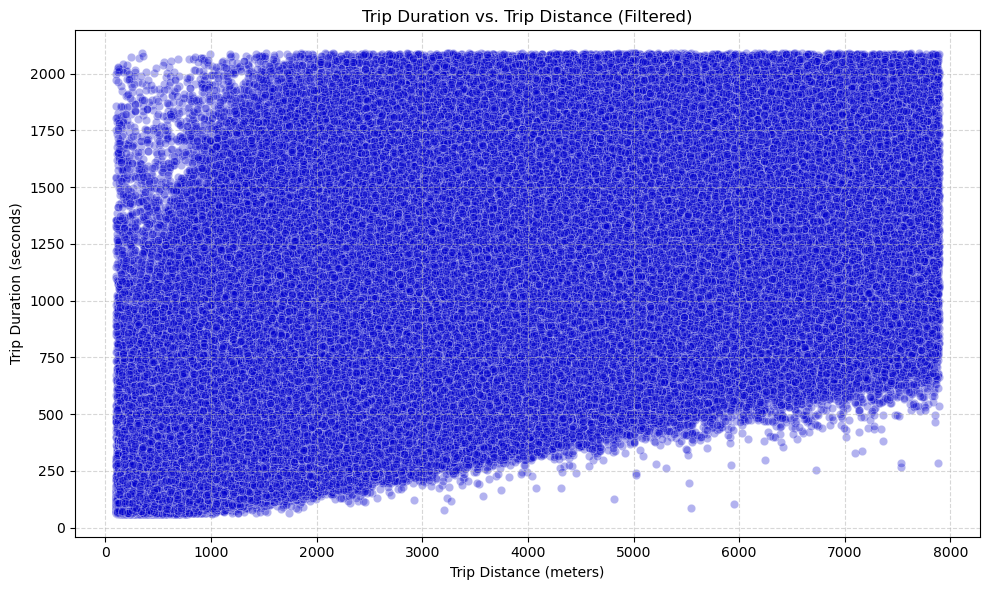

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÿ≠ÿ∞ŸÅ ÿßŸÑŸÇŸäŸÖ ÿ∫Ÿäÿ± ÿßŸÑŸÖŸÜÿ∑ŸÇŸäÿ© (ÿµŸÅÿ± ÿ£Ÿà ŸÇÿ±Ÿäÿ®ÿ© ŸÖŸÜ ÿßŸÑÿµŸÅÿ±)
filtered_data = data_train[
    (data_train['trip_duration'] > 60) &  # ÿ£ŸÉÿ™ÿ± ŸÖŸÜ 60 ÿ´ÿßŸÜŸäÿ©
    (data_train['trip_distance_meters'] > 100)  # ÿ£ŸÉÿ™ÿ± ŸÖŸÜ 100 ŸÖÿ™ÿ±
]

# ÿ≠ÿ≥ÿßÿ® IQR ŸÑŸÄ trip_duration
Q1_duration = filtered_data['trip_duration'].quantile(0.25)
Q3_duration = filtered_data['trip_duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
duration_min = Q1_duration - 1.5 * IQR_duration
duration_max = Q3_duration + 1.5 * IQR_duration

# ÿ≠ÿ≥ÿßÿ® IQR ŸÑŸÄ trip_distance_meters
Q1_dist = filtered_data['trip_distance_meters'].quantile(0.25)
Q3_dist = filtered_data['trip_distance_meters'].quantile(0.75)
IQR_dist = Q3_dist - Q1_dist
dist_min = Q1_dist - 1.5 * IQR_dist
dist_max = Q3_dist + 1.5 * IQR_dist

# ÿ™ÿµŸÅŸäÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ©
filtered_data = filtered_data[
    (filtered_data['trip_duration'] >= duration_min) &
    (filtered_data['trip_duration'] <= duration_max) &
    (filtered_data['trip_distance_meters'] >= dist_min) &
    (filtered_data['trip_distance_meters'] <= dist_max)
]

# ÿ±ÿ≥ŸÖ scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data,
    x='trip_distance_meters',
    y='trip_duration',
    alpha=0.3,
    color='mediumblue'
)

plt.title('Trip Duration vs. Trip Distance (Filtered)')
plt.xlabel('Trip Distance (meters)')
plt.ylabel('Trip Duration (seconds)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x600 with 0 Axes>

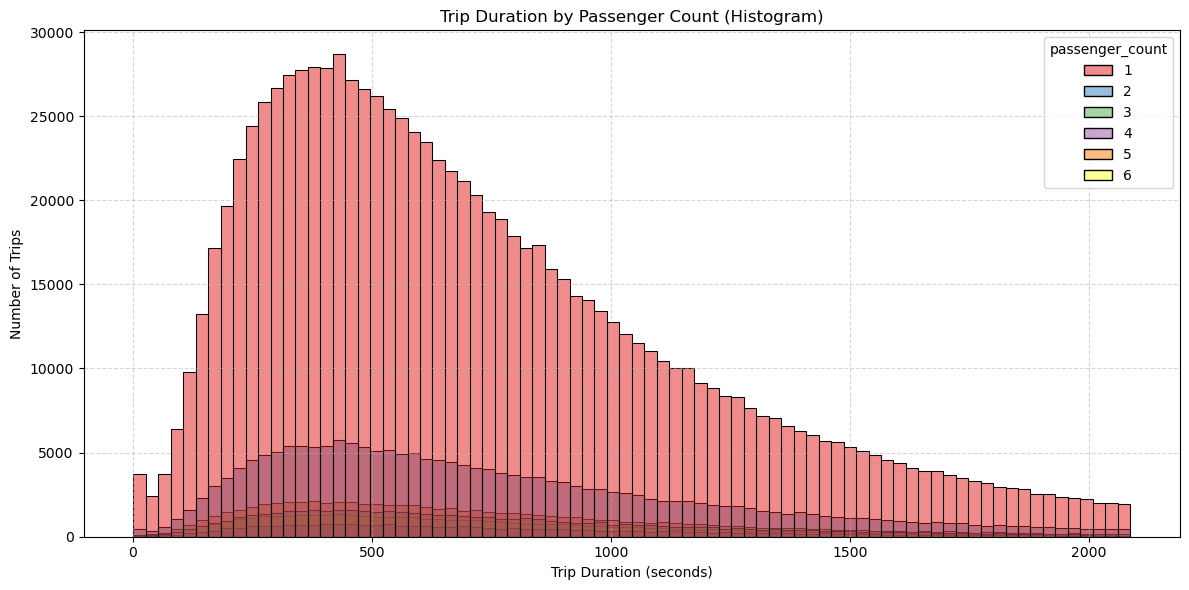

C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


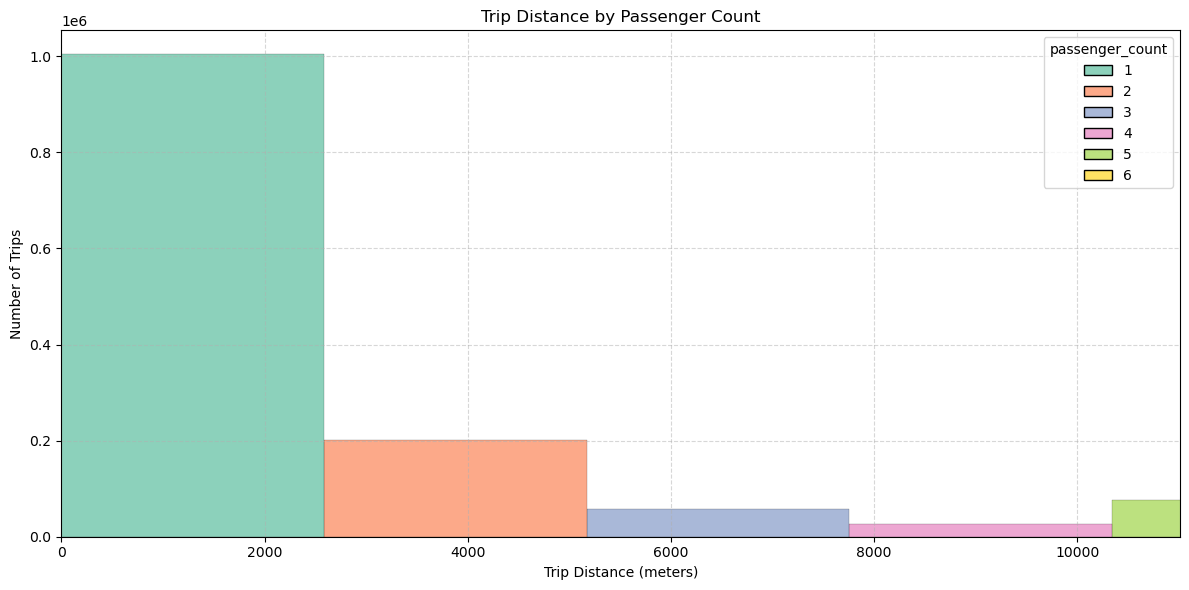

In [27]:

plt.figure(figsize=(14, 6))

# ŸÖÿØÿ© ÿßŸÑÿ±ÿ≠ŸÑÿ© ÿ≠ÿ≥ÿ® ÿπÿØÿØ ÿßŸÑÿ±ŸÉÿßÿ®
import matplotlib.pyplot as plt
import seaborn as sns

# ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ŸäŸÜ 1 Ÿà 6 ÿ±ŸÉŸëÿßÿ® Ÿàÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ© ŸÑŸÑŸÖÿØÿ©
filtered_data = data_train[
    (data_train['passenger_count'].between(1, 6)) &
    (data_train['trip_duration'] <= data_train['trip_duration'].quantile(0.95))
]

plt.figure(figsize=(12, 6))
sns.histplot(
    data=filtered_data,
    x='trip_duration',
    hue='passenger_count',
    bins=80,
    kde=False,
    palette='Set1',
    multiple='layer'  # ŸÉŸÑ ŸÅÿ¶ÿ© ŸÅŸàŸÇ ÿßŸÑÿ™ÿßŸÜŸäÿ© ÿ®ÿ¥ŸÅÿßŸÅŸäÿ©
)

plt.title("Trip Duration by Passenger Count (Histogram)")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Number of Trips")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




# ŸÖÿ≥ÿßŸÅÿ© ÿßŸÑÿ±ÿ≠ŸÑÿ© ÿ≠ÿ≥ÿ® ÿπÿØÿØ ÿßŸÑÿ±ŸÉÿßÿ®


plt.figure(figsize=(12, 6))
sns.histplot(
    data=data_train[data_train['passenger_count'].between(1, 6)],
    x='trip_distance_meters',
    hue='passenger_count',
    bins=80,
    kde=False,
    palette='Set2',
    multiple='dodge'  # ŸÅÿµŸÑ ÿßŸÑŸáÿ≥ÿ™Ÿàÿ∫ÿ±ÿßŸÖ ŸÑŸÉŸÑ ŸÅÿ¶ÿ©
)
plt.title("Trip Distance by Passenger Count")
plt.xlabel("Trip Distance (meters)")
plt.ylabel("Number of Trips")
plt.xlim(0, data_train['trip_distance_meters'].quantile(0.95))  # ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ™ÿ∑ÿ±ŸÅÿßÿ™
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




##  6. ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ≥ŸÖÿßÿ™ ŸàÿßÿÆÿ™ÿ≤ÿßŸÑ ÿßŸÑÿ£ÿ®ÿπÿßÿØ

ÿ™ÿ∑ÿ®ŸäŸÇ PCA

# ŸÉŸàÿØ ÿ™ÿ≠ŸÑŸäŸÑ PCA

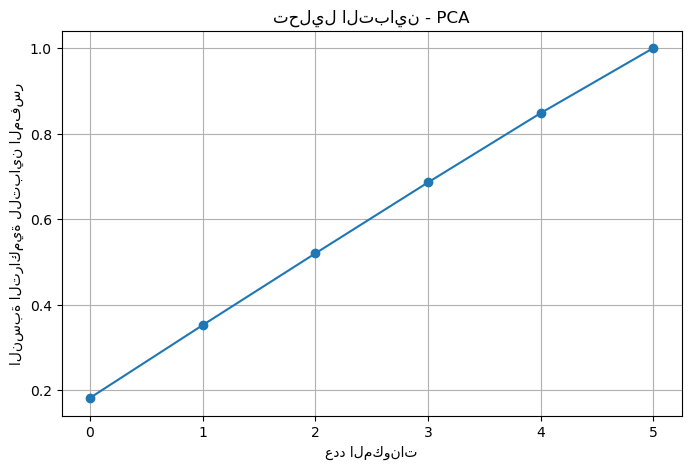

üîé RMSE ÿ®ÿπÿØ PCA (XGBoost): 366.04


In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ÿ™ÿ∑ÿ®ŸäŸÇ PCA ÿ®ÿπÿØ Standardization
pca = PCA(n_components=None)
pca.fit(X_train_scaled)

# ÿπÿ±ÿ∂ ŸÜÿ≥ÿ®ÿ© ÿßŸÑÿ™ÿ®ÿßŸäŸÜ ÿßŸÑŸÖŸÅÿ≥ÿ± ŸÑŸÉŸÑ ŸÖŸÉŸàŸÜ
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('ÿπÿØÿØ ÿßŸÑŸÖŸÉŸàŸÜÿßÿ™')
plt.ylabel('ÿßŸÑŸÜÿ≥ÿ®ÿ© ÿßŸÑÿ™ÿ±ÿßŸÉŸÖŸäÿ© ŸÑŸÑÿ™ÿ®ÿßŸäŸÜ ÿßŸÑŸÖŸÅÿ≥ÿ±')
plt.title('ÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿ™ÿ®ÿßŸäŸÜ - PCA')
plt.grid(True)
plt.show()

# ÿßÿÆÿ™Ÿäÿßÿ± ÿπÿØÿØ ŸÖŸÜÿßÿ≥ÿ® ŸÖŸÜ ÿßŸÑŸÖŸÉŸàŸÜÿßÿ™ (ŸÖÿ´ŸÑÿßŸã ÿßŸÑÿ™Ÿä ÿ™ŸÅÿ≥ÿ± 95% ŸÖŸÜ ÿßŸÑÿ™ÿ®ÿßŸäŸÜ)
pca_95 = PCA(n_components=0.95)
X_train_pca = pca_95.fit_transform(X_train_scaled)
X_val_pca = pca_95.transform(X_val_scaled)

# ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ XGBoost ÿπŸÑŸâ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿπÿØ PCA
xgb_pca_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_pca_model.fit(X_train_pca, y_train)
xgb_pca_preds = xgb_pca_model.predict(X_val_pca)

# ÿ™ŸÇŸäŸäŸÖ ÿßŸÑÿ£ÿØÿßÿ°
print(f"üîé RMSE ÿ®ÿπÿØ PCA (XGBoost): {rmse(y_val, xgb_pca_preds):.2f}")


# Time Series

In [35]:
data_clean['pickup_datetime'] = pd.to_datetime(data_clean['pickup_datetime'], errors='coerce')

data_clean['date'] = data_clean['pickup_datetime'].dt.date
data_clean['date'] = pd.to_datetime(data_clean['date'])

daily_df = data_clean.groupby('date').agg({
    'id': 'count',
    'trip_duration': 'mean',
    'trip_distance_meters': 'mean',
    'passenger_count': 'mean'
}).rename(columns={'id': 'trip_count'})


In [36]:
rolling_mean = daily_df['trip_count'].rolling(window=3, center=True).mean()
daily_df['trip_count_fixed'] = daily_df['trip_count'].copy()

for i in range(len(daily_df)):
    if daily_df['trip_count'].iloc[i] < 1000 and pd.notna(rolling_mean.iloc[i]):
        daily_df['trip_count_fixed'].iloc[i] = rolling_mean.iloc[i]


In [37]:
rolling_mean = daily_df['trip_count'].rolling(window=3, center=True).mean()
daily_df['trip_count_fixed'] = daily_df['trip_count'].copy()
threshold = 5000
trip_median = daily_df['trip_count'].median()
for i in range(len(daily_df)):
    if daily_df['trip_count'].iloc[i] < threshold:
        date_index = daily_df.index[i]
        if pd.notna(rolling_mean.loc[date_index]):
            daily_df.at[date_index, 'trip_count_fixed'] = rolling_mean.loc[date_index]
        else:
            daily_df.at[date_index, 'trip_count_fixed'] = trip_median


C:\Users\Abdulrahman\AppData\Local\Temp\ipykernel_29868\1738351629.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4130.666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  daily_df.at[date_index, 'trip_count_fixed'] = rolling_mean.loc[date_index]


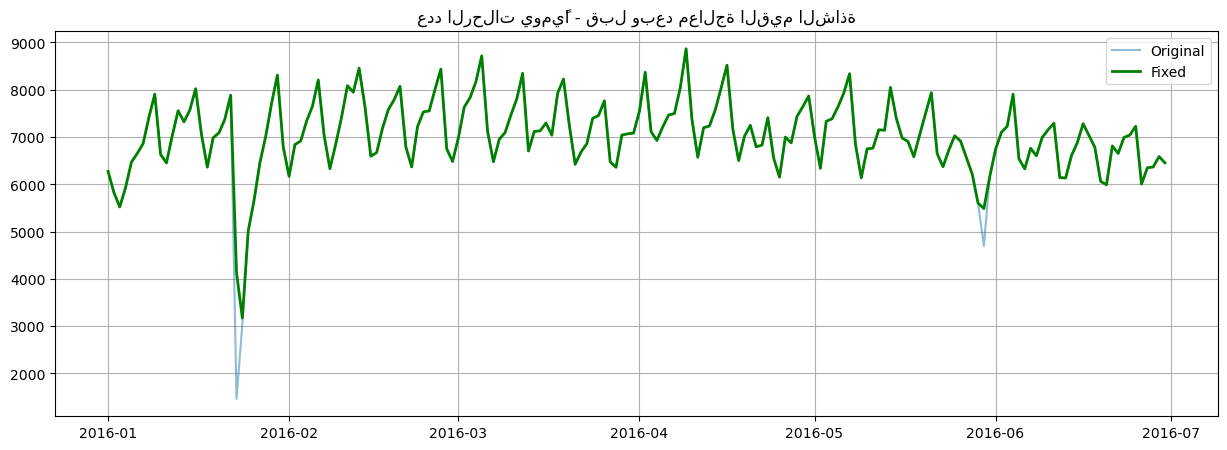

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(daily_df.index, daily_df['trip_count'], label='Original', alpha=0.5)
plt.plot(daily_df.index, daily_df['trip_count_fixed'], label='Fixed', linewidth=2, color='green')
plt.title('ÿπÿØÿØ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ŸäŸàŸÖŸäŸãÿß - ŸÇÿ®ŸÑ Ÿàÿ®ÿπÿØ ŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ©')
plt.legend()
plt.grid(True)
plt.show()


In [37]:

trip_counts = pd.Series({
    '2016-01-23': 1465,
    '2016-01-24': 3043,
    '2016-05-30': 4695,
    '2016-01-25': 5010,
    '2016-01-03': 5520
})
smallest_5 = trip_counts.nsmallest(5)

trip_counts_cleaned = trip_counts.drop(smallest_5.index)

print(trip_counts_cleaned)


Series([], dtype: int64)


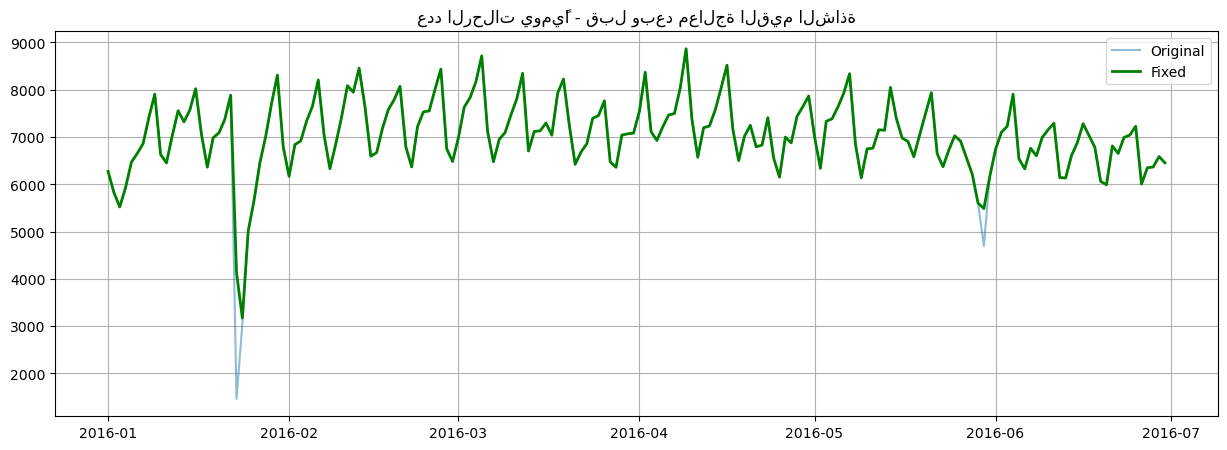

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(daily_df.index, daily_df['trip_count'], label='Original', alpha=0.5)
plt.plot(daily_df.index, daily_df['trip_count_fixed'], label='Fixed', linewidth=2, color='green')
plt.title('ÿπÿØÿØ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ŸäŸàŸÖŸäŸãÿß - ŸÇÿ®ŸÑ Ÿàÿ®ÿπÿØ ŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ©')
plt.legend()
plt.grid(True)
plt.show()


<Axes: title={'center': 'ŸÖÿ™Ÿàÿ≥ÿ∑ ŸÖÿØÿ© ÿßŸÑÿ±ÿ≠ŸÑÿ©'}, xlabel='date'>

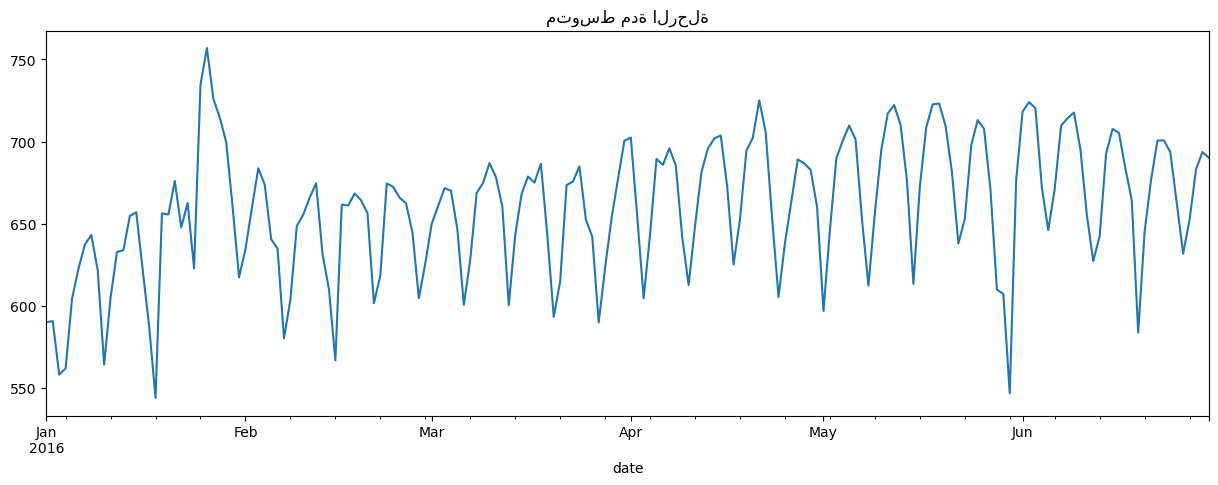

In [39]:
daily_df['trip_duration'].plot(figsize=(15,5), title='ŸÖÿ™Ÿàÿ≥ÿ∑ ŸÖÿØÿ© ÿßŸÑÿ±ÿ≠ŸÑÿ©')


<Axes: title={'center': 'ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑŸÖÿ≥ÿßŸÅÿ© ÿßŸÑŸäŸàŸÖŸäÿ©'}, xlabel='date'>

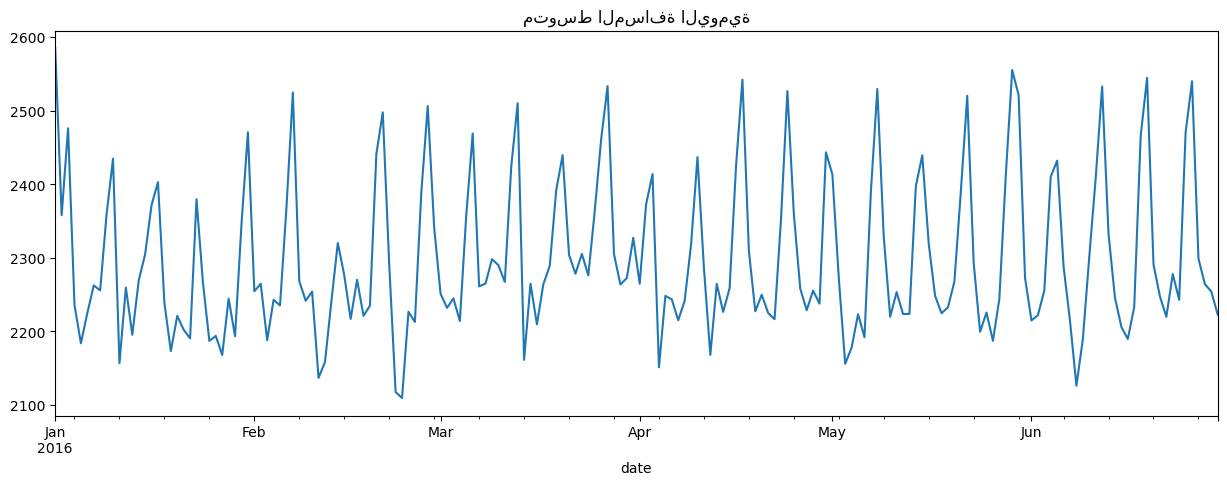

In [40]:
daily_df['trip_distance_meters'].plot(figsize=(15,5), title='ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑŸÖÿ≥ÿßŸÅÿ© ÿßŸÑŸäŸàŸÖŸäÿ©')


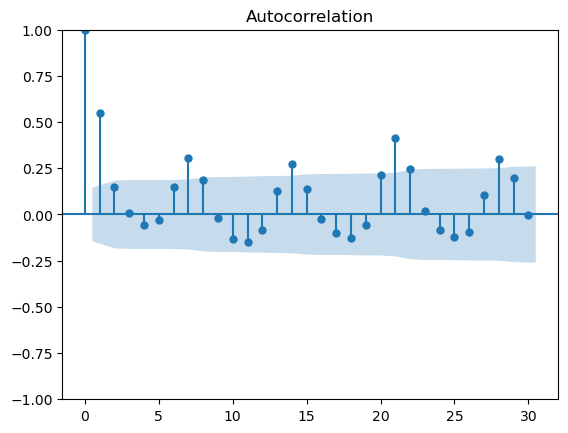

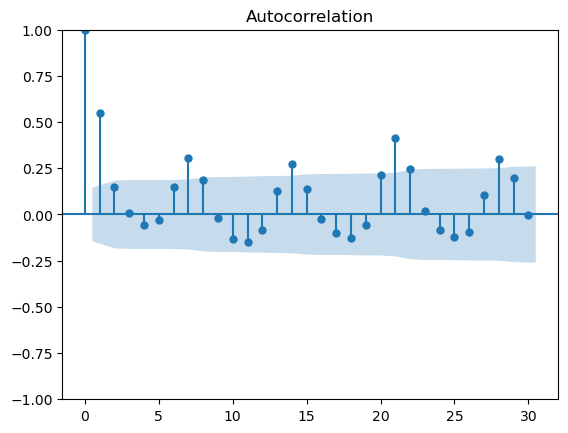

In [41]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(daily_df['trip_count'].dropna(), lags=30)


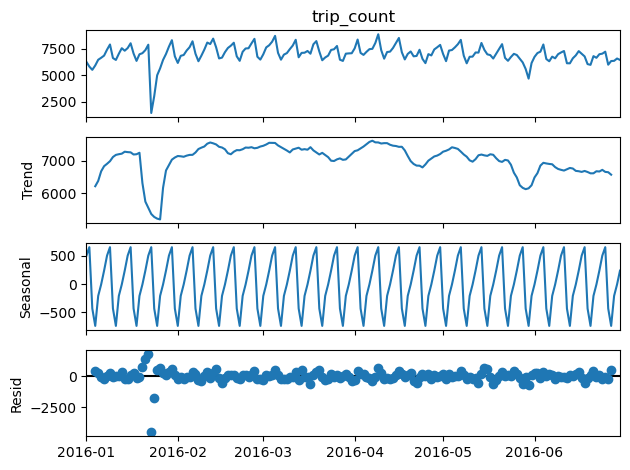

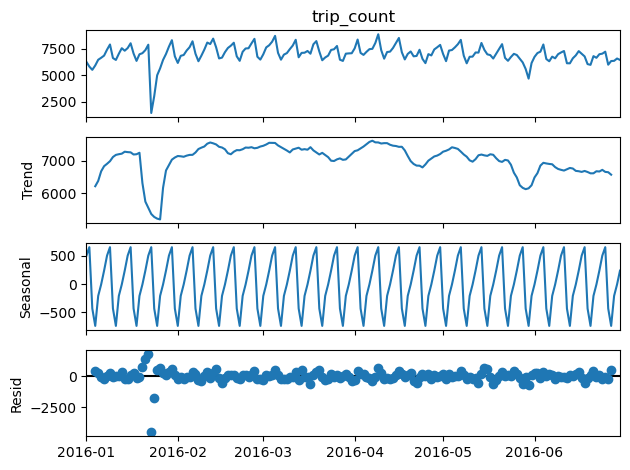

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(daily_df['trip_count'], model='additive', period=7)
result.plot()


##  7. ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ Ÿàÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'depth': [6, 8, 10],
    'learning_rate': [0.03, 0.05, 0.1],
    'iterations': [300, 500],
    'l2_leaf_reg': [1, 3, 5],
}

cat_model = CatBoostRegressor(loss_function='RMSE', verbose=0, random_state=42)

grid = GridSearchCV(cat_model, param_grid=params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

print("üìå ÿ£ŸÅÿ∂ŸÑ ŸÖÿπÿßŸÖŸÑÿßÿ™:")
print(grid.best_params_)

# ÿßŸÑÿ™ŸÇŸäŸäŸÖ
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

params = {
    'depth': randint(6, 12),
    'learning_rate': uniform(0.01, 0.2),
    'iterations': [300, 500, 700],
    'l2_leaf_reg': randint(1, 10)
}

cat_model = CatBoostRegressor(loss_function='RMSE', verbose=0, random_state=42)

rand_search = RandomizedSearchCV(cat_model, param_distributions=params, n_iter=20,
                                 scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, random_state=42)
rand_search.fit(X_train, y_train)

print("üîç ÿ£ŸÅÿ∂ŸÑ ÿ™ŸàŸÑŸäŸÅÿ© ŸÖŸÜ RandomizedSearch:")
print(rand_search.best_params_)


üîç ÿ£ŸÅÿ∂ŸÑ ÿ™ŸàŸÑŸäŸÅÿ© ŸÖŸÜ RandomizedSearch:
{'depth': 11, 'iterations': 700, 'l2_leaf_reg': 9, 'learning_rate': 0.20223440486986985}


In [65]:
import numpy as np

y_log = np.log1p(y)  # log(1 + x)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

cat_model_log = CatBoostRegressor(**rand_search.best_params_, verbose=100)
cat_model_log.fit(X_train_log, y_train_log)

y_pred_log = cat_model_log.predict(X_test_log)
y_pred_original = np.expm1(y_pred_log)

# ÿ™ŸÇŸäŸäŸÖ ÿπŸÑŸâ ÿßŸÑŸÜÿ≥ÿÆÿ© ÿßŸÑÿ£ÿµŸÑŸäÿ©
print("üìà ÿ™ŸÇŸäŸäŸÖ ÿ®ÿπÿØ ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÑŸàÿ∫ÿßÿ±Ÿäÿ™ŸÖŸä:")
print("RMSE:", mean_squared_error(y_test, y_pred_original, squared=False))


0:	learn: 0.6108106	total: 222ms	remaining: 2m 35s
100:	learn: 0.4118763	total: 19.2s	remaining: 1m 53s
200:	learn: 0.4031468	total: 38.4s	remaining: 1m 35s
300:	learn: 0.3977839	total: 57.4s	remaining: 1m 16s
400:	learn: 0.3930282	total: 1m 16s	remaining: 57.3s
500:	learn: 0.3897913	total: 1m 36s	remaining: 38.2s
600:	learn: 0.3867296	total: 1m 55s	remaining: 19s
699:	learn: 0.3841216	total: 2m 14s	remaining: 0us
üìà ÿ™ŸÇŸäŸäŸÖ ÿ®ÿπÿØ ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÑŸàÿ∫ÿßÿ±Ÿäÿ™ŸÖŸä:
RMSE: 235.93181762273096


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ÿ•ÿπÿßÿØÿ© ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
cat_best = CatBoostRegressor(
    depth=11,
    iterations=700,
    learning_rate=0.20223440486986985,
    l2_leaf_reg=9,
    loss_function='RMSE',
    verbose=100,
    random_state=42
)

cat_best.fit(X_train, y_train)

# ÿßŸÑÿ™ŸÜÿ®ÿ§
y_pred_best = cat_best.predict(X_test)

# ÿ™ŸÇŸäŸäŸÖ ÿßŸÑÿ£ÿØÿßÿ°
rmse = mean_squared_error(y_test, y_pred_best, squared=False)
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print("‚úÖ CatBoost Final Model Performance:")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE : {mae:.2f}")
print(f"  R¬≤  : {r2:.4f}")


0:	learn: 338.6136678	total: 439ms	remaining: 5m 6s
100:	learn: 234.9053571	total: 27.2s	remaining: 2m 41s
200:	learn: 231.5713875	total: 57.4s	remaining: 2m 22s
300:	learn: 229.5703898	total: 1m 26s	remaining: 1m 54s
400:	learn: 227.9872639	total: 1m 51s	remaining: 1m 23s
500:	learn: 226.5349302	total: 2m 16s	remaining: 54.2s
600:	learn: 225.3024723	total: 2m 44s	remaining: 27.1s
699:	learn: 224.2079714	total: 3m 12s	remaining: 0us
‚úÖ CatBoost Final Model Performance:
  RMSE: 231.01
  MAE : 172.09
  R¬≤  : 0.6231


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import gc
from sklearn.linear_model import LogisticRegression

# ÿ™ŸÇŸÑŸäŸÑ ÿ≠ÿ¨ŸÖ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ ŸÑÿ™ŸÇŸÑŸäŸÑ ÿßÿ≥ÿ™ŸáŸÑÿßŸÉ ÿßŸÑÿ∞ÿßŸÉÿ±ÿ©
cat_model = CatBoostRegressor(
    depth=8,
    iterations=300,
    learning_rate=0.15,
    l2_leaf_reg=9,
    loss_function='RMSE',
    verbose=0,
    random_state=42
)

xgb = XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,
    random_state=42
)

# ŸÜŸÖŸàÿ∞ÿ¨ Stacking ŸÖÿ®ÿ≥ÿ∑
stack = StackingRegressor(
    estimators=[
        ('cat', cat_model),
        ('xgb', xgb),
        ('rf', rf)
    ],
    final_estimator=Ridge(),
    n_jobs=1  # ÿ™ÿ¥ÿ∫ŸäŸÑ ÿ™ÿ≥ŸÑÿ≥ŸÑŸä ŸÑÿ™ŸÇŸÑŸäŸÑ ÿßŸÑÿ∞ÿßŸÉÿ±ÿ©
)

# ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ∞ÿßŸÉÿ±ÿ©
gc.collect()

# ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
stack.fit(X_train, y_train)

# ÿßŸÑÿ™ŸÜÿ®ÿ§
y_pred_stack = stack.predict(X_test)

# ÿßŸÑÿ™ŸÇŸäŸäŸÖ
print("üì¶ Stacked Model Performance:")
print("  ‚úÖ RMSE:", mean_squared_error(y_test, y_pred_stack, squared=False))
print("  ‚úÖ R¬≤  :", r2_score(y_test, y_pred_stack))


üì¶ Stacked Model Performance:
  ‚úÖ RMSE: 235.64870240409664
  ‚úÖ R¬≤  : 0.607777164484791


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# ÿ•ÿπÿØÿßÿØ ÿ¥ÿ®ŸÉÿ© ÿ£ÿ®ÿ≥ÿ∑ ŸÑÿ™ŸÇŸÑŸäŸÑ ÿßÿ≥ÿ™ŸáŸÑÿßŸÉ ÿßŸÑÿ∞ÿßŸÉÿ±ÿ©
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],  # ÿ•ÿ≤ÿßŸÑÿ© None ŸÑÿ™ŸÅÿßÿØŸä ÿßÿ≥ÿ™ŸáŸÑÿßŸÉ ŸÉÿ®Ÿäÿ± ŸÑŸÑÿ∞ÿßŸÉÿ±ÿ©
    'min_samples_split': [2, 5]
}

# ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÜŸàÿßÿ© Ÿàÿßÿ≠ÿØÿ© ÿ®ÿØŸÑÿßŸã ŸÖŸÜ ŸÉŸÑ ÿßŸÑÿ£ŸÜŸàŸäÿ©
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=1  # ‚úÖ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÖÿπÿßŸÑÿ¨ Ÿàÿßÿ≠ÿØ ŸÅŸÇÿ∑ ŸÑÿ™ŸÇŸÑŸäŸÑ ÿßŸÑÿ∂ÿ∫ÿ∑ ÿπŸÑŸâ ÿßŸÑÿ∞ÿßŸÉÿ±ÿ©
)

grid_search.fit(X_train, y_train)

print("ÿ£ŸÅÿ∂ŸÑ ÿßŸÑŸÖÿπÿßŸÖŸÑÿßÿ™:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 8 candidates, totalling 24 fits


ÿ®ÿØŸÑ Stacking ‚Üí ÿßÿ≥ÿ™ÿÆÿØŸÖ VotingRegressor

In [50]:
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor
import gc

# ŸÜŸÖŸàÿ∞ÿ¨ ŸÖÿ®ÿ≥ÿ∑ ŸÖŸÜ CatBoost ŸÑÿ™ŸÇŸÑŸäŸÑ ÿßŸÑÿ∂ÿ∫ÿ∑ ÿπŸÑŸâ ÿßŸÑÿ∞ÿßŸÉÿ±ÿ©
cat_model = CatBoostRegressor(
    depth=6,
    iterations=300,
    learning_rate=0.1,
    l2_leaf_reg=5,
    loss_function='RMSE',
    verbose=0,
    random_state=42
)

# ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ∞ÿßŸÉÿ±ÿ© ŸÇÿ®ŸÑ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
gc.collect()

# ŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑÿ™ÿµŸàŸäÿ™
voting = VotingRegressor([
    ('cat', cat_model),
    ('xgb', xgb),
    ('rf', rf)
])

voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)

print("ü§ù Voting Model Performance:")
print("  ‚úÖ RMSE:", mean_squared_error(y_test, y_pred_voting, squared=False))
print


ü§ù Voting Model Performance:
  ‚úÖ RMSE: 241.73179067662034


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [55]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(
    n_estimators=10000,
    learning_rate=0.1,
    max_depth=9,
    random_state=42
)

lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)

print("üåø LightGBM Performance:")
print("  ‚úÖ RMSE:", mean_squared_error(y_test, y_pred_lgb, squared=False))
print("  ‚úÖ R¬≤  :", r2_score(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 1022004, number of used features: 6
[LightGBM] [Info] Start training from score 660.063956
üåø LightGBM Performance:
  ‚úÖ RMSE: 230.82598874314678
  ‚úÖ R¬≤  : 0.6236671072474462


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [61]:
# üîß ÿÆŸÑŸäÿ© 2: ÿ™ÿ≠ÿ≥ŸäŸÜ ÿ£ÿØÿßÿ° XGBoost ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ GridSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200]
}

grid_model = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_model.fit(X_train_scaled, y_train)

print("‚úÖ ÿ£ŸÅÿ∂ŸÑ ŸÖÿπÿßŸÖŸÑÿßÿ™:", grid_model.best_params_)

# ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑÿ£ŸÅÿ∂ŸÑ
best_model = grid_model.best_estimator_
y_pred_best = best_model.predict(X_val_scaled)

print(f"üìâ RMSE ŸÑŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑŸÖÿ≠ÿ≥ŸÜ (GridSearchCV): {rmse(y_val, y_pred_best):.2f}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits
‚úÖ ÿ£ŸÅÿ∂ŸÑ ŸÖÿπÿßŸÖŸÑÿßÿ™: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}


TypeError: 'numpy.float64' object is not callable

##  8. ÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ Ÿàÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿ£ÿØÿßÿ°

 1. ÿ∂ÿ®ÿ∑ ÿßŸÑŸÖÿπÿßŸÖŸÑÿßÿ™ (Hyperparameter Tuning)
  ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ GridSearchCV

ÿ™ÿ≠ŸÑŸäŸÑ residuals (ÿ£ÿÆÿ∑ÿßÿ° ÿßŸÑÿ™ŸÜÿ®ÿ§)

##  9. ÿßŸÑÿÆÿßÿ™ŸÖÿ© ŸàÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt


In [4]:
data_train.shape

(1458644, 11)

ÿ≠ÿ≥ÿßÿ® ÿπÿØÿØ ÿßŸÑÿ±ŸÉÿßÿ® ÿ∂ŸÖŸÜ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™


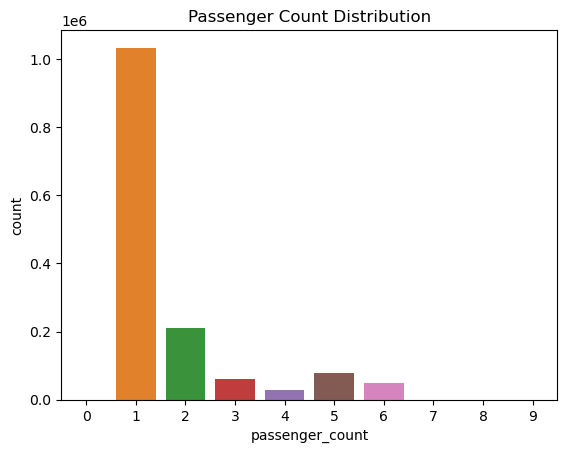

In [11]:
sns.countplot(x='passenger_count', data=data_train)
plt.title('Passenger Count Distribution')
plt.show()


In [12]:
print(data_train['passenger_count'].value_counts())


passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64


ÿ≠ÿ≥ÿßÿ® ÿπÿØÿØ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ®ÿßŸÑÿ≥ÿßÿπÿßÿ™ :

ŸÖÿπÿ±ŸÅÿ© ÿ£ŸàŸÇÿßÿ™ ÿßŸÑÿ∞ÿ±Ÿàÿ© ÿßŸÑŸäŸàŸÖŸäÿ©

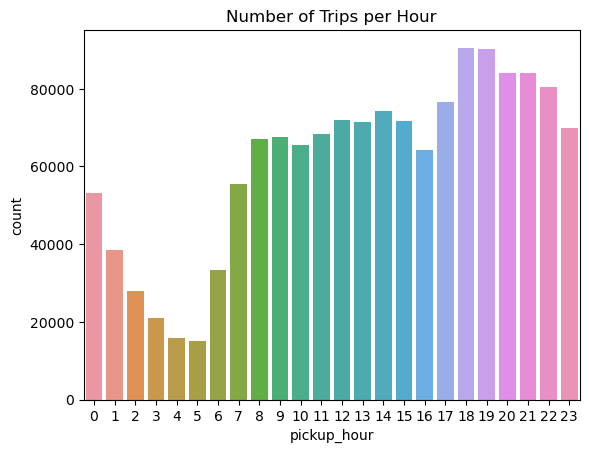

In [14]:
sns.countplot(x='pickup_hour', data=data_train)
plt.title('Number of Trips per Hour')
plt.show()


ÿπÿØÿØ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ≠ÿ≥ÿ® ŸäŸàŸÖ ÿßŸÑÿ£ÿ≥ÿ®Ÿàÿπ:

ÿ™ÿ≠ŸÑŸäŸÑ ŸÜŸÖÿ∑ ÿßŸÑÿ£ŸäÿßŸÖ: ÿπÿ∑ŸÑ ŸÖŸÇÿßÿ®ŸÑ ÿØŸàÿßŸÖ

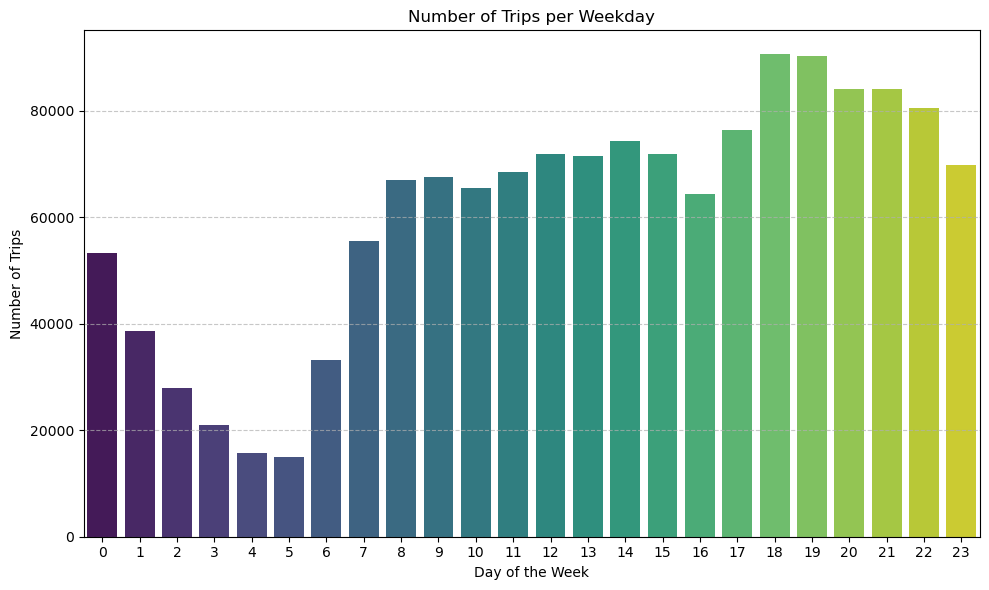

In [15]:

# ÿÆÿ±Ÿäÿ∑ÿ© ÿßŸÑÿ£ÿπŸÖÿØÿ© (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=data_train, palette='viridis')


plt.title('Number of Trips per Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


ÿπÿØÿØ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ŸÅŸä ŸÉŸÑ ŸäŸàŸÖ ŸÖŸÜ ÿßŸÑÿ¥Ÿáÿ±:
ŸÖÿ™ÿßÿ®ÿπÿ© ÿßŸÑŸÜÿ¥ÿßÿ∑ ÿßŸÑÿ¥Ÿáÿ±Ÿä

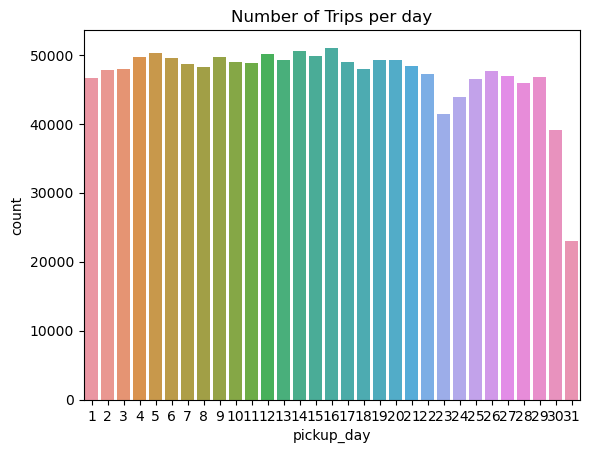

In [16]:
sns.countplot(x='pickup_day', data=data_train)
plt.title('Number of Trips per day')
plt.show()


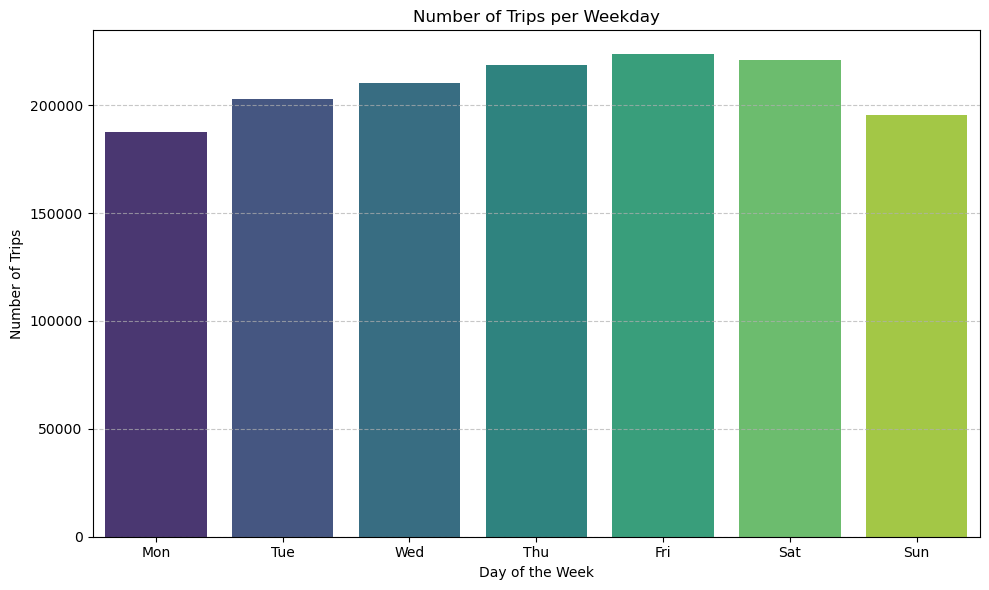

In [17]:

# ÿÆÿ±Ÿäÿ∑ÿ© ÿßŸÑÿ£ÿπŸÖÿØÿ© (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_weekday', data=data_train, palette='viridis')

# ÿ™ÿ≥ŸÖŸäÿ© ÿßŸÑÿ£ŸäÿßŸÖ ÿ®ÿØŸÑ ÿßŸÑÿ£ÿ±ŸÇÿßŸÖ
plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5, 6],
    labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
)

plt.title('Number of Trips per Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
unique_vendors = data_train['vendor_id'].unique()
unique_vendors


array([2, 1], dtype=int64)

In [19]:

vendor_counts = data_train['vendor_id'].value_counts()


print("ÿ£ŸÉÿ™ÿ± ÿ¥ÿ±ŸÉÿ© (vendor_id) ÿ™ŸÉÿ±ÿßÿ±ÿßŸã:")
print(vendor_counts)


print("\nÿ£ŸÉÿ™ÿ± ÿ¥ÿ±ŸÉÿ© ÿ™ŸÉÿ±ÿßÿ±ÿßŸã ŸáŸä:")
print(vendor_counts.idxmax(), "ÿ®ÿπÿØÿØ =", vendor_counts.max())


ÿ£ŸÉÿ™ÿ± ÿ¥ÿ±ŸÉÿ© (vendor_id) ÿ™ŸÉÿ±ÿßÿ±ÿßŸã:
vendor_id
2    780302
1    678342
Name: count, dtype: int64

ÿ£ŸÉÿ™ÿ± ÿ¥ÿ±ŸÉÿ© ÿ™ŸÉÿ±ÿßÿ±ÿßŸã ŸáŸä:
2 ÿ®ÿπÿØÿØ = 780302


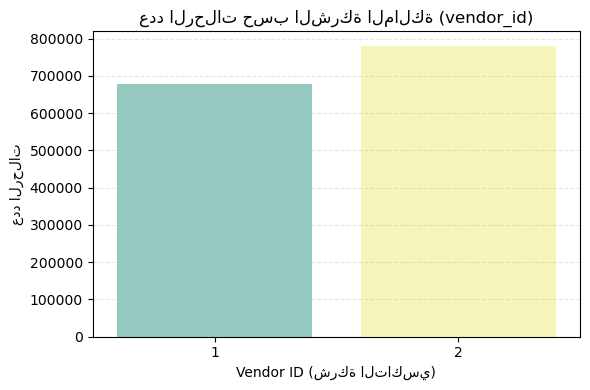

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='vendor_id', data=data_train, palette='Set3')

plt.title('ÿπÿØÿØ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ≠ÿ≥ÿ® ÿßŸÑÿ¥ÿ±ŸÉÿ© ÿßŸÑŸÖÿßŸÑŸÉÿ© (vendor_id)')
plt.xlabel('Vendor ID (ÿ¥ÿ±ŸÉÿ© ÿßŸÑÿ™ÿßŸÉÿ≥Ÿä)')
plt.ylabel('ÿπÿØÿØ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


ÿ™ÿπÿ±ŸÅ ŸÖÿØŸâ ÿßŸÑŸÖÿ≥ÿßŸÅÿßÿ™ ÿßŸÑŸÅÿπŸÑŸäÿ© ŸÑŸÑÿ±ÿ≠ŸÑÿßÿ™.

ÿ™ŸÉÿ¥ŸÅ ÿπŸÜ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿßŸÑÿ¥ÿßÿ∞ÿ© (ŸÖÿ´ŸÑÿßŸã ŸÖÿ≥ÿßŸÅÿ© 0 ÿ£Ÿà ŸÅŸàŸÇ 100 ŸÉŸÖ).

ŸäŸÖŸÉŸÜ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ trip_distance_meters ŸÉŸÖŸäÿ≤ÿ© (feature) ŸÖŸáŸÖÿ© ŸÑÿ™ŸàŸÇÿπ ŸÖÿØÿ© ÿßŸÑÿ±ÿ≠ŸÑÿ© ÿ£Ÿà ÿßŸÑÿ£ÿ¨ÿ±ÿ©.

ÿ≠ŸàŸÑŸÜÿß ÿπŸÖŸàÿØ pickup_datetime ŸÑÿ™ÿßÿ±ŸäÿÆ ŸàŸàŸÇÿ™ ÿ≠ŸÇŸäŸÇŸä

ÿ≠ÿ™Ÿâ ŸÜŸÇÿØÿ± ŸÜÿ≥ÿ™ÿÆÿ±ÿ¨ ŸÖŸÜŸá ŸÖÿπŸÑŸàŸÖÿßÿ™.


ÿßÿ≥ÿ™ÿÆÿ±ÿ¨ŸÜÿß ÿÆÿµÿßÿ¶ÿµ ÿ≤ŸÖŸÜŸäÿ© ŸÖÿ´ŸÑ:

pickup_hour: ÿßŸÑÿ≥ÿßÿπÿ© (ŸÖÿ´ŸÑÿßŸã 8 ÿµÿ®ÿßÿ≠Ÿãÿß)

pickup_weekday: ÿßŸÑŸäŸàŸÖ ÿ®ÿßŸÑÿ£ÿ≥ÿ®Ÿàÿπ (ŸÖÿ´ŸÑÿßŸã ÿßŸÑÿ¨ŸÖÿπÿ©)

pickup_month: ÿßŸÑÿ¥Ÿáÿ±

pickup_is_weekend: ŸáŸÑ ÿßŸÑÿ±ÿ≠ŸÑÿ© ÿ®ÿπÿ∑ŸÑÿ© ŸÜŸáÿßŸäÿ© ÿßŸÑÿ£ÿ≥ÿ®Ÿàÿπÿü

ÿ±ÿ≥ŸÖŸÜÿß ŸÖÿÆÿ∑ÿ∑ÿßÿ™:

ÿ™Ÿàÿ≤ÿπ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ≠ÿ≥ÿ® ÿßŸÑÿ≥ÿßÿπÿ©

ÿ≠ÿ≥ÿ® ÿ£ŸäÿßŸÖ ÿßŸÑÿ£ÿ≥ÿ®Ÿàÿπ

ÿ≠ÿ≥ÿ® ÿßŸÑÿ£ÿ¥Ÿáÿ±

** ÿßŸÑŸáÿØŸÅ ŸÖŸÜ ŸÉŸÑ ŸÖÿß ÿ≥ÿ®ŸÇ**

ŸÜŸÅŸáŸÖ ŸÖÿ™Ÿâ ŸäŸÉŸàŸÜ ÿßŸÑÿ∑ŸÑÿ® ÿπŸÑŸâ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ£ÿπŸÑŸâ.

ŸÜÿ≥ÿ™ÿÆÿØŸÖ Ÿáÿ∞Ÿá ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™ ŸÉŸÄ ŸÖŸäÿ≤ÿßÿ™ (features) ŸÖŸÅŸäÿØÿ© ŸÅŸä ŸÜŸÖÿßÿ∞ÿ¨ ÿßŸÑÿ™ŸàŸÇÿπ.

ŸÜŸÉÿ™ÿ¥ŸÅ ÿ£ŸÜŸÖÿßÿ∑ ÿßŸÑÿßÿ≤ÿØÿ≠ÿßŸÖ ÿ£Ÿà ÿßŸÑÿπÿ∑ŸÑ ÿßŸÑŸÑŸä ÿ™ÿ£ÿ´ÿ± ÿπŸÑŸâ ÿßŸÑÿ±ÿ≠ŸÑÿ©.

In [28]:
print(data_train['pickup_hour'].value_counts().sort_index())

print(data_train['pickup_weekday'].value_counts().sort_index())

print(data_train['pickup_month'].value_counts().sort_index())


pickup_hour
0     53248
1     38571
2     27972
3     20895
4     15792
5     15002
6     33248
7     55600
8     67053
9     67663
10    65437
11    68476
12    71873
13    71473
14    74292
15    71811
16    64313
17    76483
18    90600
19    90308
20    84072
21    84185
22    80492
23    69785
Name: count, dtype: int64
pickup_weekday
0    187418
1    202749
2    210136
3    218574
4    223533
5    220868
6    195366
Name: count, dtype: int64
pickup_month
1    229707
2    238300
3    256189
4    251645
5    248487
6    234316
Name: count, dtype: int64


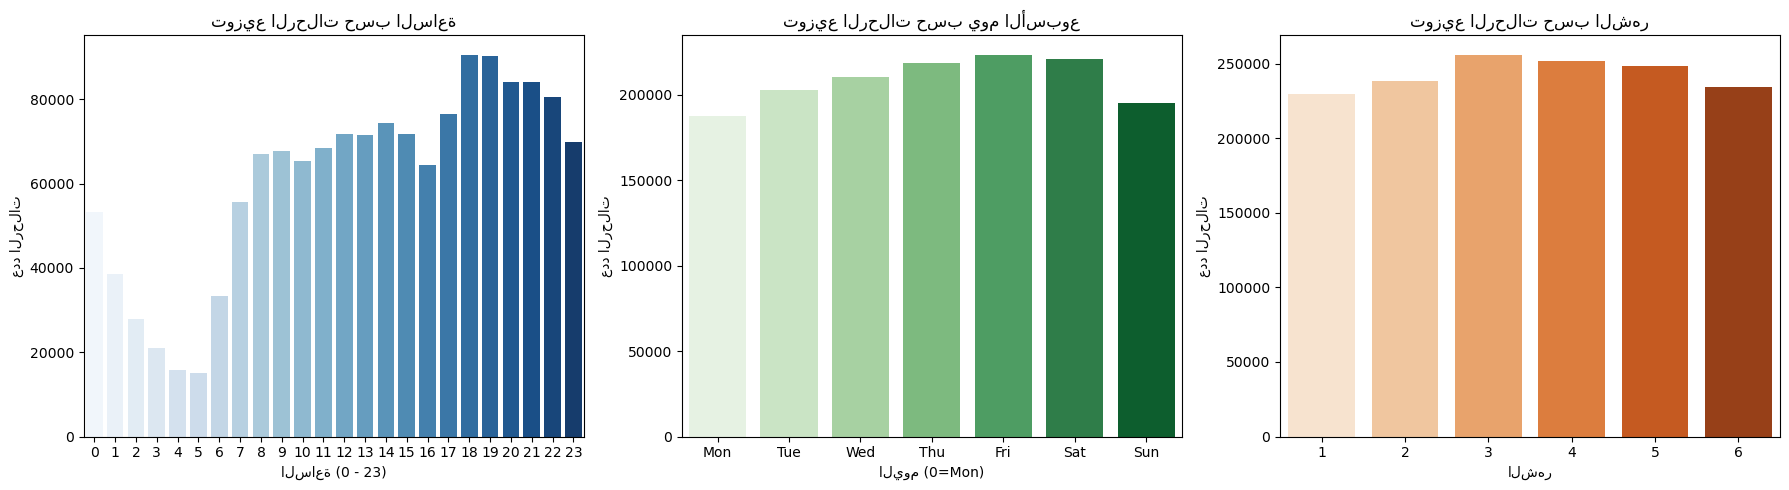

In [29]:

plt.figure(figsize=(18, 5))

# ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ≠ÿ≥ÿ® ÿßŸÑÿ≥ÿßÿπÿ©
plt.subplot(1, 3, 1)
sns.countplot(x='pickup_hour', data=data_train, palette='Blues')
plt.title('ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ≠ÿ≥ÿ® ÿßŸÑÿ≥ÿßÿπÿ©')
plt.xlabel('ÿßŸÑÿ≥ÿßÿπÿ© (0 - 23)')
plt.ylabel('ÿπÿØÿØ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™')

# ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ≠ÿ≥ÿ® ŸäŸàŸÖ ÿßŸÑÿ£ÿ≥ÿ®Ÿàÿπ
plt.subplot(1, 3, 2)
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(x='pickup_weekday', data=data_train, palette='Greens')
plt.title('ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ≠ÿ≥ÿ® ŸäŸàŸÖ ÿßŸÑÿ£ÿ≥ÿ®Ÿàÿπ')
plt.xlabel('ÿßŸÑŸäŸàŸÖ (0=Mon)')
plt.xticks(ticks=range(7), labels=weekday_labels)
plt.ylabel('ÿπÿØÿØ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™')

# ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ≠ÿ≥ÿ® ÿßŸÑÿ¥Ÿáÿ±
plt.subplot(1, 3, 3)
sns.countplot(x='pickup_month', data=data_train, palette='Oranges')
plt.title('ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ≠ÿ≥ÿ® ÿßŸÑÿ¥Ÿáÿ±')
plt.xlabel('ÿßŸÑÿ¥Ÿáÿ±')
plt.ylabel('ÿπÿØÿØ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™')

plt.tight_layout()
plt.show()


ÿ™ÿ≠ŸÑŸäŸÑ ŸÖÿØÿ© ÿßŸÑÿ±ÿ≠ŸÑÿ© (trip_duration) ÿ®ÿπÿØ ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ© (Outliers)ÿå ŸÖÿπ ÿ™Ÿàÿ∂Ÿäÿ≠ ÿßŸÑŸÅÿ±ŸÇ ÿ≠ÿ≥ÿ® ÿπÿØÿØ ÿßŸÑÿ±ŸÉÿßÿ® (passenger_count).

ŸÑÿ•ÿ≤ÿßŸÑÿ© ÿ™ÿ£ÿ´Ÿäÿ± ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ∫ÿ±Ÿäÿ®ÿ© ÿßŸÑÿ™Ÿä ŸÇÿØ ÿ™ÿÆÿ±ÿ® ÿßŸÑÿ™ÿ≠ŸÑŸäŸÑ ÿ£Ÿà ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨.

ŸÑŸÖŸÑÿßÿ≠ÿ∏ÿ© ÿ•ŸÜ ŸÉÿßŸÜ ÿπÿØÿØ ÿßŸÑÿ±ŸÉÿßÿ® Ÿäÿ§ÿ´ÿ± ÿπŸÑŸâ ŸÖÿØÿ© ÿßŸÑÿ±ÿ≠ŸÑÿ©.

ŸÑÿ™ÿ≠ÿ≥ŸäŸÜ ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÇÿ®ŸÑ ÿ™ÿØÿ±Ÿäÿ® ÿ£Ÿä ŸÜŸÖŸàÿ∞ÿ¨.

ÿ±ÿ≥ŸÖ ÿÆÿ±Ÿäÿ∑ÿ© ÿ≠ÿ±ÿßÿ±Ÿäÿ© ÿ´ŸÜÿßÿ¶Ÿäÿ© ÿßŸÑÿ£ÿ®ÿπÿßÿØ (2D Histogram) ÿ™Ÿàÿ∂ÿ≠ ÿßŸÑÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ: 

CORELATION


ŸÖÿØÿ© ÿßŸÑÿ±ÿ≠ŸÑÿ© (trip_duration)

ŸÖÿ≥ÿßŸÅÿ© ÿßŸÑÿ±ÿ≠ŸÑÿ© (trip_distance_meters)

ŸÖŸÖÿß ÿ≥ÿßÿπÿØ ÿπŸÑŸâ ÿ™ÿ≠ÿØŸäÿØ ŸÜŸÖÿ∑ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿßŸÑÿ∑ÿ®ŸäÿπŸäÿ©

Ÿäÿ≥ÿßÿπÿØ ÿπŸÑŸâ ÿ±ÿ§Ÿäÿ© ÿßŸÑÿπŸÑÿßŸÇÿ© ÿßŸÑŸÖÿ®ÿßÿ¥ÿ±ÿ© ÿ®ŸäŸÜ ÿßŸÑŸÖÿ≥ÿßŸÅÿ© ŸàÿßŸÑŸÖÿØÿ©.

ŸäŸèÿ∏Ÿáÿ± ÿ•ÿ∞ÿß ŸÉÿßŸÜÿ™ ŸáŸÜÿßŸÉ ŸÜŸÖÿ∑ ÿÆÿ∑Ÿä (ŸÉŸÑŸÖÿß ÿ≤ÿßÿØÿ™ ÿßŸÑŸÖÿ≥ÿßŸÅÿ© ÿ≤ÿßÿØÿ™ ÿßŸÑŸÖÿØÿ©).

Ÿäÿ≥ÿßŸáŸÖ ŸÅŸä ŸÅŸáŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÇÿ®ŸÑ ÿ®ŸÜÿßÿ° ŸÜŸÖŸàÿ∞ÿ¨ ÿ™ŸÜÿ®ÿ§Ÿä

" ÿßŸÑÿ®ÿ≠ÿ´ ÿ∂ŸÖŸÜ ÿπŸÖŸàÿØ ÿπÿØÿØ ÿßŸÑÿ±ŸÉÿßÿ® ŸÑŸÉÿ¥ŸÅ ÿßŸÑŸÇŸäŸÖ ÿ∫Ÿäÿ± ÿßŸÑŸÖŸÜÿ∑ŸÇŸäÿ© ŸÖÿ´ŸÑ Ÿàÿ¨ŸàÿØ 0 ÿ±ŸÉÿßÿ® ÿ£Ÿà ÿ£ŸÉÿ´ÿ± ŸÖŸÜ 6ÿå Ÿàÿ™ŸÖ ÿ™ÿ≠ÿØŸäÿØ ÿπÿØÿØ Ÿáÿ∞Ÿá ÿßŸÑÿ≠ÿßŸÑÿßÿ™ ŸÑŸÖÿ±ÿßÿ¨ÿπÿ™Ÿáÿß ÿ£Ÿà ŸÖÿπÿßŸÑÿ¨ÿ™Ÿáÿß ŸÑÿßÿ≠ŸÇŸãÿß."



In [34]:
# ÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿ±ŸÉÿßÿ®
print("Unique passenger counts:", data_train['passenger_count'].unique())

invalid_passengers = data_train[(data_train['passenger_count'] == 0) | (data_train['passenger_count'] > 6)]
print(f"ÿπÿØÿØ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ®ŸÇŸäŸÖ ÿ¥ÿßÿ∞ÿ© ŸÑÿπÿØÿØ ÿßŸÑÿ±ŸÉÿßÿ®: {len(invalid_passengers)}")


Unique passenger counts: [1 6 4 2 3 5 0 7 9 8]
ÿπÿØÿØ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ®ŸÇŸäŸÖ ÿ¥ÿßÿ∞ÿ© ŸÑÿπÿØÿØ ÿßŸÑÿ±ŸÉÿßÿ®: 65


ÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ ÿπÿØÿØ ÿßŸÑÿ±ŸÉÿßÿ® (passenger_count) Ÿà:

ŸÖÿØÿ© ÿßŸÑÿ±ÿ≠ŸÑÿ© (trip_duration)

ŸÖÿ≥ÿßŸÅÿ© ÿßŸÑÿ±ÿ≠ŸÑÿ© (trip_distance_meters)
ŸÑŸÖÿπÿ±ŸÅÿ© ŸáŸÑ ŸáŸÜÿßŸÉ ÿ™ÿ£ÿ´Ÿäÿ± Ÿàÿßÿ∂ÿ≠ ŸÑÿπÿØÿØ ÿßŸÑÿ±ŸÉÿßÿ® ÿπŸÑŸâ ÿßŸÑÿ≤ŸÖŸÜ ÿ£Ÿà ÿßŸÑŸÖÿ≥ÿßŸÅÿ©.

**Machine Learning**


Linear Regression with **StandardScaler**
ÿßŸÑÿßŸÜÿ≠ÿØÿßÿ± ÿßŸÑÿÆÿ∑Ÿä Ÿäÿ™ÿ£ÿ´ÿ± ÿ®ÿ¥ŸÉŸÑ ŸÉÿ®Ÿäÿ± ÿ®ÿßŸÑŸàÿ≠ÿØÿßÿ™ ŸàÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©.

ŸÅŸÖÿ´ŸÑÿßŸã: ÿßŸÑŸÖÿ≥ÿßŸÅÿ© ÿ®ÿßŸÑÿ£ŸÖÿ™ÿßÿ± ÿ£ŸÉÿ®ÿ± ÿ®ŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿπÿØÿØ ÿßŸÑÿ±ŸÉÿßÿ® ‚Üí Ÿáÿ∞ÿß ŸäÿÆŸÑŸä coefficients ŸÖŸÜÿ≠ÿßÿ≤ÿ©.

ŸÑÿ∞ŸÑŸÉ ŸÇŸÖŸÜÿß ÿ®ÿ™Ÿàÿ≠ŸäÿØ ÿßŸÑŸÇŸäŸÖ ŸÑÿ™ŸÉŸàŸÜ ÿ®ŸÖÿ™Ÿàÿ≥ÿ∑ = 0 ŸàÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπŸäÿßÿ±Ÿä = 1 (Normalization).


**F-TEST**

*why?*

Ÿáÿ∞ÿß ÿßÿÆÿ™ÿ®ÿßÿ± ÿ•ÿ≠ÿµÿßÿ¶Ÿä ÿ®ÿ≥Ÿäÿ∑ Ÿäÿπÿ∑Ÿä ŸÅŸÉÿ±ÿ© ÿ≥ÿ±Ÿäÿπÿ© ÿπŸÜ ÿßÿ±ÿ™ÿ®ÿßÿ∑ ŸÉŸÑ ŸÖŸäÿ≤ÿ© ÿ®ÿ¥ŸÉŸÑ ÿÆÿ∑Ÿä ŸÖÿπ ÿßŸÑŸáÿØŸÅ.

ŸÖŸáŸÖ ŸÅŸä ŸÖÿ±ÿ≠ŸÑÿ© ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑŸÖŸäÿ≤ÿßÿ™ (feature selection) ŸÑÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖÿ™ÿ∫Ÿäÿ±ÿßÿ™ ÿßŸÑÿ™Ÿä ÿ™ÿ≥ÿ™ÿ≠ŸÇ ÿßŸÑÿßÿ≥ÿ™ŸÖÿ±ÿßÿ± ŸÅŸä ÿßŸÑŸÜŸÖÿ∞ÿ¨ÿ©.

ŸäÿÆÿ™ŸÑŸÅ ÿπŸÜ ÿ£ŸáŸÖŸäÿ© ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸÖŸÜ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ (ŸÖÿ´ŸÑ Random Forest ÿ£Ÿà Linear Regression) ŸÑÿ£ŸÜŸá Ÿäÿπÿ™ŸÖÿØ ŸÅŸÇÿ∑ ÿπŸÑŸâ ÿßÿÆÿ™ÿ®ÿßÿ± ÿ•ÿ≠ÿµÿßÿ¶Ÿä.


C:\Users\Abdulrahman\AppData\Local\Temp\ipykernel_21984\765287570.py:41: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\Abdulrahman\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


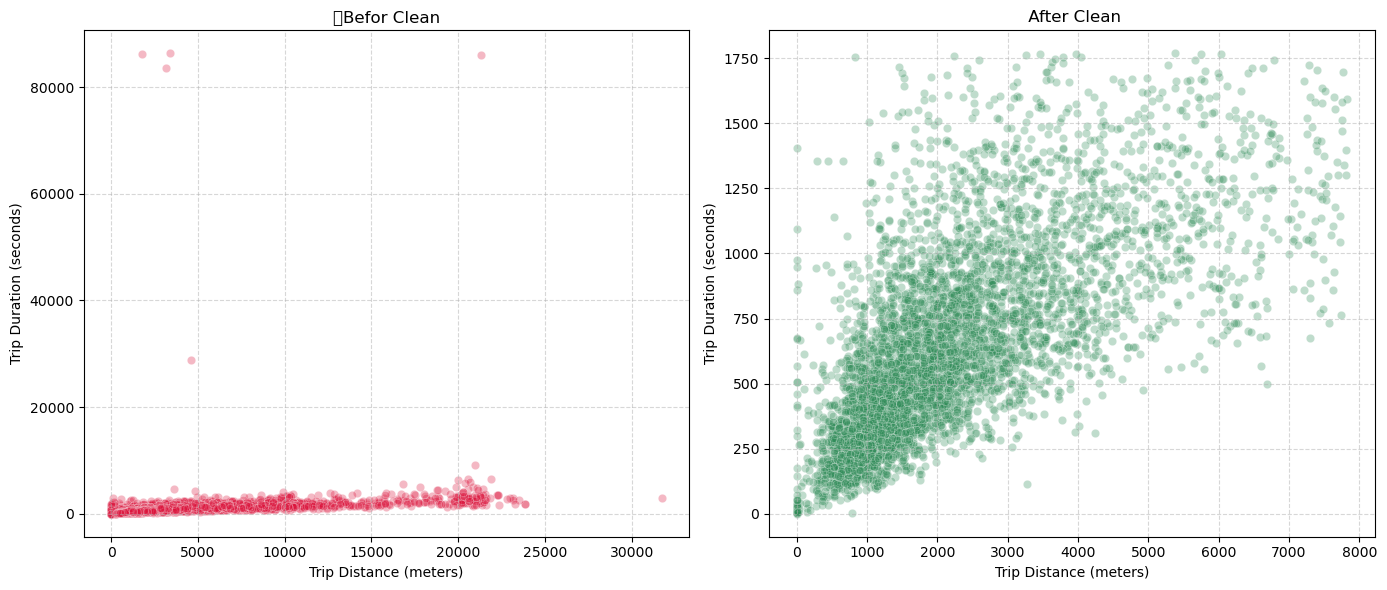

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÿ®ŸäÿßŸÜÿßÿ™ ŸÇÿ®ŸÑ ÿßŸÑÿ™ŸÜÿ∏ŸäŸÅ (ŸÜÿ£ÿÆÿ∞ ÿπŸäŸÜÿ© ÿπÿ¥Ÿàÿßÿ¶Ÿäÿ© ŸÑÿ≥ŸáŸàŸÑÿ© ÿßŸÑÿ±ÿ≥ŸÖ)
sample_before = data_train.sample(5000, random_state=42)

# ÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿπÿØ ÿßŸÑÿ™ŸÜÿ∏ŸäŸÅ (ŸÜÿ£ÿÆÿ∞ ŸÜŸÅÿ≥ ÿßŸÑÿπÿØÿØ ŸÑŸÑŸÖŸÇÿßÿ±ŸÜÿ© ÿßŸÑÿπÿßÿØŸÑÿ©)
sample_after = data_clean.sample(5000, random_state=42)

# ÿßŸÑÿ¥ŸÉŸÑ
plt.figure(figsize=(14, 6))

# ŸÇÿ®ŸÑ ÿßŸÑÿ™ŸÜÿ∏ŸäŸÅ
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=sample_before,
    x='trip_distance_meters',
    y='trip_duration',
    alpha=0.3,
    color='crimson'
)
plt.title("üö´Befor Clean")
plt.xlabel("Trip Distance (meters)")
plt.ylabel("Trip Duration (seconds)")
plt.grid(True, linestyle='--', alpha=0.5)

# ÿ®ÿπÿØ ÿßŸÑÿ™ŸÜÿ∏ŸäŸÅ
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=sample_after,
    x='trip_distance_meters',
    y='trip_duration',
    alpha=0.3,
    color='seagreen'
)
plt.title(" After Clean")
plt.xlabel("Trip Distance (meters)")
plt.ylabel("Trip Duration (seconds)")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ≥ŸÖÿßÿ™ ÿ™ŸÑŸÇÿßÿ¶ŸäŸãÿß (Feature Selection)

ÿßÿ≥ŸÜÿÆÿØÿßŸÖ ÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿ© CatBoost

In [59]:
# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿ∫Ÿäÿ± ÿßŸÑŸÖŸÜÿ∑ŸÇŸäÿ©
data_clean = data_clean[(data_clean['trip_duration'] > 60) & (data_clean['trip_duration'] < 36000)]



üìä ÿ¨ÿØŸàŸÑ ŸÖŸÇÿßÿ±ŸÜÿ© ÿßŸÑÿ£ÿØÿßÿ°:
                 Model        RMSE         MAE        R¬≤
0  CatBoost (Original)  195.285656  134.180246  0.811323
1     CatBoost (Tuned)  211.675023  152.240859  0.778324


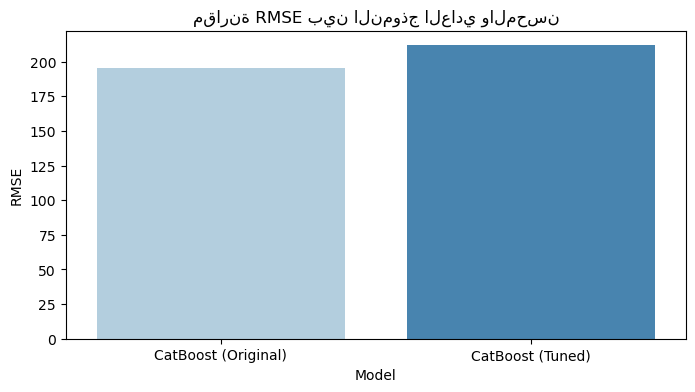

In [47]:
# ÿ≠ÿ≥ÿßÿ® ÿ£ÿØÿßÿ° ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑÿπÿßÿØŸä
rmse_old = mean_squared_error(y_test, y_pred, squared=False)
mae_old = mean_absolute_error(y_test, y_pred)
r2_old = r2_score(y_test, y_pred)

# ÿ•ŸÜÿ¥ÿßÿ° ÿ¨ÿØŸàŸÑ ÿßŸÑŸÖŸÇÿßÿ±ŸÜÿ©
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

compare_df = pd.DataFrame({
    'Model': ['CatBoost (Original)', 'CatBoost (Tuned)'],
    'RMSE': [rmse_old, rmse],
    'MAE': [mae_old, mae],
    'R¬≤': [r2_old, r2]
})

# ÿπÿ±ÿ∂ ÿ¨ÿØŸàŸÑ ÿßŸÑŸÖŸÇÿßÿ±ŸÜÿ©
print("\nüìä ÿ¨ÿØŸàŸÑ ŸÖŸÇÿßÿ±ŸÜÿ© ÿßŸÑÿ£ÿØÿßÿ°:")
print(compare_df)

# ÿ±ÿ≥ŸÖ RMSE ŸÑŸÑŸÖŸÇÿßÿ±ŸÜÿ©
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='RMSE', data=compare_df, palette='Blues')
plt.title("ŸÖŸÇÿßÿ±ŸÜÿ© RMSE ÿ®ŸäŸÜ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑÿπÿßÿØŸä ŸàÿßŸÑŸÖÿ≠ÿ≥ŸÜ")
plt.ylabel("RMSE")
plt.show()


 3. ÿ™ÿ¨ÿ±ÿ®ÿ© ŸÜŸÖÿßÿ∞ÿ¨ Ensemble ÿ£ŸÇŸàŸâ ŸÖŸÜ CatBoost ŸÅŸÇÿ∑

‚úÖ ŸÖÿßÿ∞ÿß Ÿäÿ≠ÿØÿ´ ŸáŸÜÿßÿü
ŸÜÿ≥ÿ™ÿÆÿØŸÖ ŸÜŸÖŸàÿ∞ÿ¨ŸäŸÜ ŸÖŸÜ CatBoost ŸÉŸÑ Ÿàÿßÿ≠ÿØ ÿ®ÿ£ŸÅÿ∂ŸÑ ŸÖÿπÿßŸäŸäÿ±Ÿá.

ŸÜÿ∂ŸäŸÅ ŸÖÿπŸáŸÖ XGBoost Ÿà RandomForest.

Ridge ŸÉŸÄ final estimator ÿ≠ÿ™Ÿâ Ÿäÿ¨ŸÖÿπ ÿ™ŸÜÿ®ÿ§ÿßÿ™ŸáŸÖ ÿ®ÿ¥ŸÉŸÑ ÿÆÿ∑Ÿä.

n_jobs=-1 ŸÑÿ™ÿ≥ÿ±Ÿäÿπ ÿßŸÑÿ™ÿØÿ±Ÿäÿ® (Ÿäÿ≥ÿ™ÿÆÿØŸÖ ŸÉŸÑ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿßÿ™ ÿßŸÑŸÖÿ™ŸàŸÅÿ±ÿ©).

#  ÿ∂ÿ®ÿ∑ ÿßŸÑŸÖÿπÿßŸÖŸÑÿßÿ™ (Hyperparameter Tuning)

ÿ¨ÿ±ÿ® LightGBM

ÿ™ÿ∑ÿ®ŸäŸÇ ÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿßÿ™ ML:
Linear Regression

Decision Tree

Random Forest

XGBoost

#  ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ SHAP ŸÑÿ™ŸÅÿ≥Ÿäÿ± ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ (Feature Importance)

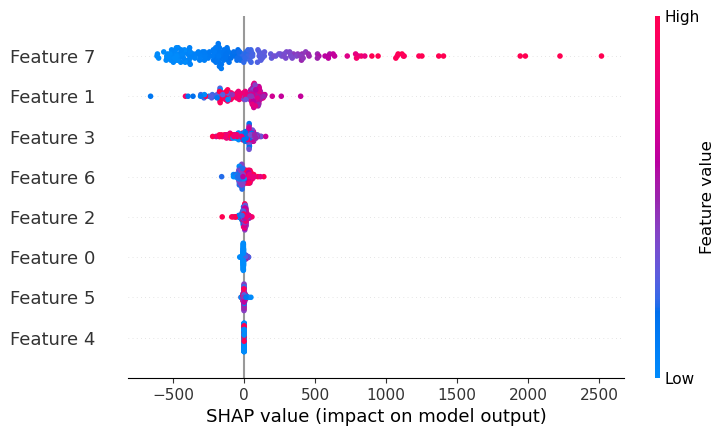

In [46]:
# üîç ÿÆŸÑŸäÿ© 1: ÿ™ŸÅÿ≥Ÿäÿ± ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÖŸÉÿ™ÿ®ÿ© SHAP
import shap

# ÿ™ÿ¨ŸáŸäÿ≤ explainer ŸÑŸÜŸÖŸàÿ∞ÿ¨ XGBoost ÿßŸÑŸÖÿ≠ÿ≥ŸÜ
explainer = shap.Explainer(xgb_improved, X_train_scaled)
shap_values = explainer(X_val_scaled[:200])  # ÿßŸÑÿ™ŸÅÿ≥Ÿäÿ± ŸÑÿπŸäŸÜÿ© ÿµÿ∫Ÿäÿ±ÿ© ŸÑÿ≤ŸäÿßÿØÿ© ÿßŸÑÿ≥ÿ±ÿπÿ©

# ÿ±ÿ≥ŸÖ ÿ™ÿ£ÿ´Ÿäÿ± ÿßŸÑÿ≥ŸÖÿßÿ™
shap.plots.beeswarm(shap_values)


ÿßÿ≥ÿ™ÿπŸÖÿßŸÑ Early Stopping ŸÖÿπ Cross-Validation

In [43]:
from catboost import Pool, cv, CatBoostRegressor

train_pool = Pool(X_train, y_train)

params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'depth': 6,
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'early_stopping_rounds': 50,
    'verbose': False
}

cv_results = cv(train_pool, params, fold_count=5, plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 235.466846
bestIteration = 999

Training on fold [1/5]

bestTest = 234.9529861
bestIteration = 999

Training on fold [2/5]

bestTest = 235.6469037
bestIteration = 999

Training on fold [3/5]

bestTest = 234.110561
bestIteration = 998

Training on fold [4/5]

bestTest = 235.5080266
bestIteration = 999



ÿ•ŸÜÿ¥ÿßÿ° Pipeline Ensemble ÿ®ŸäŸÜ CatBoost Ÿà XGBoost

In [44]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# filtered_data['pickup_minute'] = data_train['pickup_datetime'].dt.minute
# filtered_data['distance_km'] = haversine_distance(
#     data_train['pickup_latitude'],
#     data_train['pickup_longitude'],
#     data_train['dropoff_latitude'],
#     data_train['dropoff_longitude']
# )

X = filtered_data[features_enhanced]
y = filtered_data['trip_duration']  

# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑŸÖÿ≥ÿ®ŸÇÿ© (ÿ™ÿ≠ÿ¨ŸäŸÖ ŸÑŸÑÿ≥ŸÖÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸÇÿ∑)
# ŸÑÿßÿ≠ÿ∏ ÿ£ŸÜ CatBoost ŸàXGBoost ŸÑÿß Ÿäÿ™ÿ∑ŸÑÿ®ÿßŸÜ one-hot encoding ŸäÿØŸàŸä ŸÑŸÑÿ≥ŸÖÿßÿ™ ÿßŸÑÿ±ŸÇŸÖŸäÿ©
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), features_enhanced)
])

# ÿ™ÿπÿ±ŸäŸÅ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨
catboost_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    objective='reg:squarederror',
    random_state=42
)

# ÿ•ŸÜÿ¥ÿßÿ° pipeline ŸÑŸÉŸÑ ŸÜŸÖŸàÿ∞ÿ¨
pipeline_cat = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', catboost_model)])

pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', xgb_model)])

# ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ŸäŸÜ
pipeline_cat.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)

# ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
cat_preds = pipeline_cat.predict(X_test)
xgb_preds = pipeline_xgb.predict(X_test)

# ÿØŸÖÿ¨ ÿßŸÑÿ™ŸÜÿ®ÿ§ÿßÿ™ (Ensemble)
ensemble_preds = (cat_preds + xgb_preds) / 2

# ÿßŸÑÿ™ŸÇŸäŸäŸÖ
rmse = mean_squared_error(y_test, ensemble_preds, squared=False)
mae = mean_absolute_error(y_test, ensemble_preds)
r2 = r2_score(y_test, ensemble_preds)

print(f"Ensemble Model Results (with selected features):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R¬≤:   {r2:.4f}")


Ensemble Model Results (with selected features):
RMSE: 211.68
MAE:  152.24
R¬≤:   0.7783


In [42]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = filtered_data[features_enhanced]
y = filtered_data['trip_duration']  

# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb = LGBMRegressor(
    n_estimators=10000,
    learning_rate=0.1,
    max_depth=9,
    random_state=42
)

lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)

print("LightGBM Performance:")
print("RMSE:", mean_squared_error(y_test, y_pred_lgb, squared=False))
print("R¬≤  :", r2_score(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.123512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1677
[LightGBM] [Info] Number of data points in the train set: 1107001, number of used features: 13
[LightGBM] [Info] Start training from score 731.134640
LightGBM Performance:
RMSE: 194.02338503620624
R¬≤  : 0.8117894709104421


In [46]:
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline

catboost_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)

# ÿ•ŸÜÿ¥ÿßÿ° pipeline ŸÑŸÉŸÑ ŸÜŸÖŸàÿ∞ÿ¨
pipeline_cat = Pipeline(steps=[('regressor', catboost_model)])
pipeline_cat.fit(X_train, y_train)

cat_preds = pipeline_cat.predict(X_test)

print("RMSE:", mean_squared_error(y_test, cat_preds, squared=False))
print("R¬≤  :", r2_score(y_test, cat_preds))

RMSE: 216.90338410618486
R¬≤  : 0.764783156932901


# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿπÿØŸÖ Ÿàÿ¨ŸàÿØ ŸÇŸäŸÖ ÿ¥ÿßÿ∞ÿ© 

C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


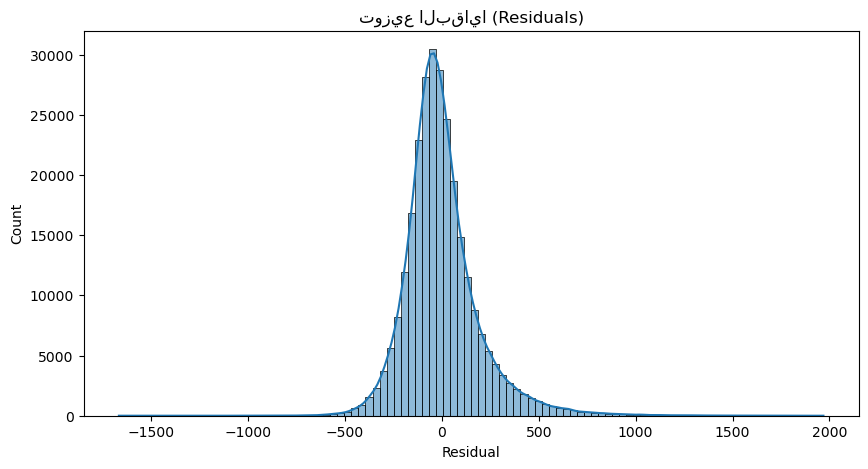

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred_lgb  # ÿ£Ÿà inverse_transform ÿ•ÿ∞ÿß ŸÉŸÜÿ™ ÿßÿ≥ÿ™ÿÆÿØŸÖÿ™ log

plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=100, kde=True)
plt.title('ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ®ŸÇÿßŸäÿß (Residuals)')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


In [42]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

et = ExtraTreesRegressor(
    n_estimators=10000,   #ŸÖŸÖÿßÿ´ŸÑÿ© ŸÑŸÄ LightGBM
    max_depth=9,          #ŸÜŸÅÿ≥ ÿßŸÑÿπŸÖŸÇ
    random_state=42,
    n_jobs=-1             #ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÉŸÑ ÿßŸÑÿ£ŸÜŸàŸäÿ© ÿßŸÑŸÖÿ™ŸàŸÅÿ±ÿ© ŸÑÿ™ÿ≥ÿ±Ÿäÿπ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
)

et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

print(" ExtraTreesRegressor Performance:")
print(" RMSE:", mean_squared_error(y_test, y_pred_et, squared=False))
print(" R¬≤  :", r2_score(y_test, y_pred_et))


üå≤ ExtraTreesRegressor Performance:
  ‚úÖ RMSE: 277.44990750371187
  ‚úÖ R¬≤  : 0.6191554649288007


In [43]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(
    max_iter=500,   # Ÿäÿ¥ÿ®Ÿá ÿπÿØÿØ ÿßŸÑÿ£ÿ¥ÿ¨ÿßÿ±
    max_depth=9,
    learning_rate=0.1,
    random_state=42
)
hgb.fit(X_train, y_train)
y_pred_hgb = hgb.predict(X_test)

print("  HistGradientBoosting Performance:")
print("  RMSE:", mean_squared_error(y_test, y_pred_hgb, squared=False))
print("  R¬≤  :", r2_score(y_test, y_pred_hgb))


  HistGradientBoosting Performance:
  RMSE: 206.59168454782514
  R¬≤  : 0.7888436077753714
